In [ ]:
# Installer PyTorch si nécessaire (sous Windows, CPU par défaut)
import importlib
import sys

package = 'torch'
try:
    importlib.import_module(package)
    print('PyTorch est déjà installé.')
except ImportError:
source
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Récupérer les résultats: préférer df_prime (nouveau) puis res_df puis CSV
df_plot = None
try:
    df_plot = df_prime.copy()
    print('Utilisation de df_prime en mémoire')
except NameError:
    try:
        df_plot = res_df.copy()
        print('Utilisation de res_df en mémoire')
    except NameError:
        if os.path.exists('sigmoid_fit_results.csv'):
            df_plot = pd.read_csv('sigmoid_fit_results.csv')
            print('Chargé sigmoid_fit_results.csv')
        elif os.path.exists('df_prime.csv'):
            df_plot = pd.read_csv('df_prime.csv')
            print('Chargé df_prime.csv')
        else:
            raise FileNotFoundError('Aucun DataFrame en mémoire et aucun CSV (sigmoid_fit_results.csv ou df_prime.csv) trouvé.')

# Filtrer les fits réussis si la colonne 'status' existe
if 'status' in df_plot.columns:
    df_ok = df_plot[df_plot['status'] == 'ok'].copy()
else:
    df_ok = df_plot.copy()

if df_ok.empty:
    print('Aucun fit réussi à tracer (status == 
 ou jeu de données vide).')
else:
    # S'assurer que les colonnes existent et sont numériques
    df_ok['DELTA'] = df_ok['DELTA'].astype(float)
    if 'd0' not in df_ok.columns:
        raise KeyError('La colonne d0 est introuvable dans les résultats.')
    df_ok['d0'] = df_ok['d0'].astype(float)
    plt.figure(figsize=(8,5))
    sns.boxplot(x='DELTA', y='d0', data=df_ok, color='lightblue')
    sns.stripplot(x='DELTA', y='d0', data=df_ok, color='darkblue', alpha=0.6, jitter=True, size=6)
    plt.xlabel('DELTA')
    plt.ylabel('d0 (paramètre dinflection)')
    plt.title('Distribution de d0 en fonction de DELTA (fits réussis)')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

## Linear Regression

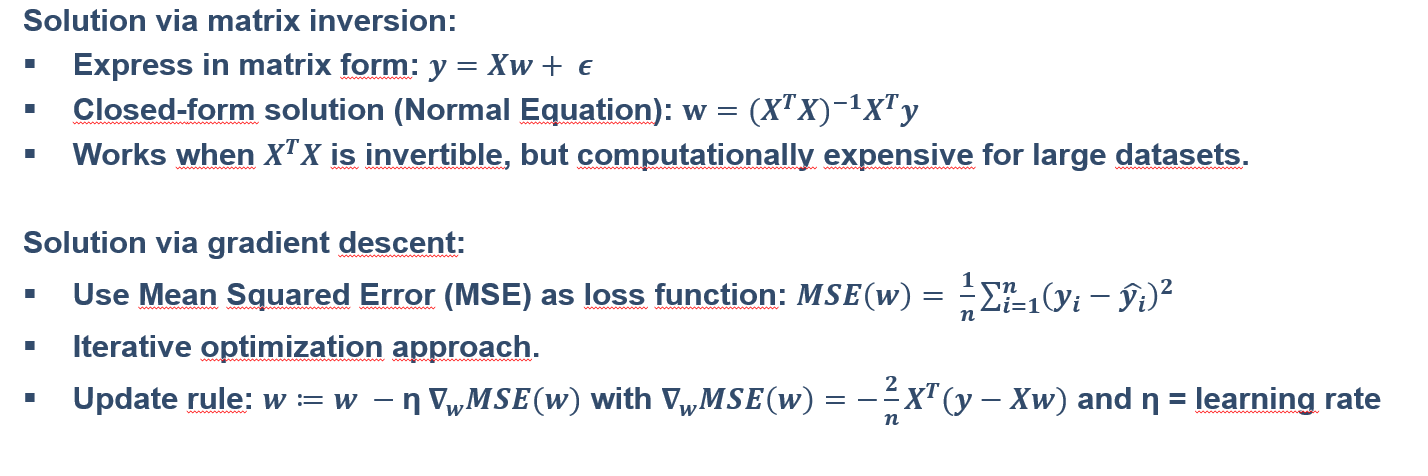

In [92]:
X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
X.head()

Y = df[["PK"]]
Y.head()



,PK
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### 1/ When doing supervised learning, what are the main preparation steps of our dataset? 

The main preparation steps are : 
- Cleaning outlier,duplicate preparing data
- Split data into train , validation and test
- Choose a model (Linear Regression,decision Tree, neural network ...)
- Train the model by minimizing a loss function
- Evaluate model performance with proper metrics
- Deploy & monitor



### 2/ Supervised learning is about minimizing a loss. What is the loss we are going to minimize? 

Minimizing the lost function MSE

### 3/ Is this loss the only indicator of a good regression? Which other metrics could be relevant to look at ?
- Accuracy: Correct predictions / Total predictions
- Precision: TP / (TP+FP)
- Recall (Sensitivity): TP / (TP+FN)
- F1-Score: F1 = 2 ⋅ Precision ⋅ Recall / (Precision + Recall)


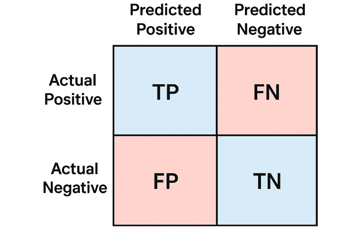

### 4/ For each of the following regression method, report the metrics once the loss minimization has be done. Report also the size of the model in memory, as well as the inference time (the time it takes to output the PK given a configuration never seen in the dataset). 

### 4.1/ Test linear regression. Ridge regression. Lasso regression.

#### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle   


model = LinearRegression()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

import time
start_train = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_train


start_time = time.time()
y_pred = model.predict(X_test)
inference_time = time.time() - start_time


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

size_bytes = sys.getsizeof(pickle.dumps(model))




table_result = pd.DataFrame({
    "Model": ["Linear Regression"], 
    "MSE": [mse],   
    "R2": [r2],
    "Infernce Time":[inference_time],   
    "Training Time":[training_time],
    "Size (bytes)":[size_bytes]
})
print(table_result)


               Model      MSE        R2  Infernce Time  Training Time  \
0  Linear Regression  0.07914  0.662594       0.006415       0.079412   

   Size (bytes)  
0           693  


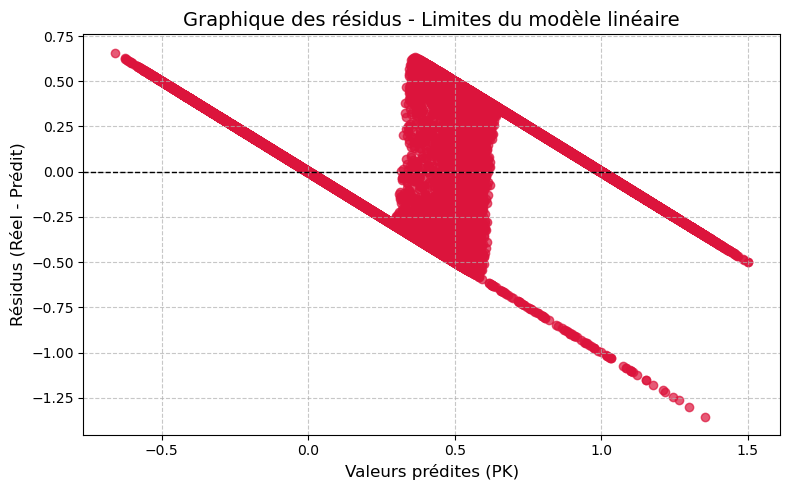

In [94]:
# Graphique des résidus pour visualiser les limites du modèle linéaire
residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.7, color='crimson')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Valeurs prédites (PK)", fontsize=12)
plt.ylabel("Résidus (Réel - Prédit)", fontsize=12)
plt.title("Graphique des résidus - Limites du modèle linéaire", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

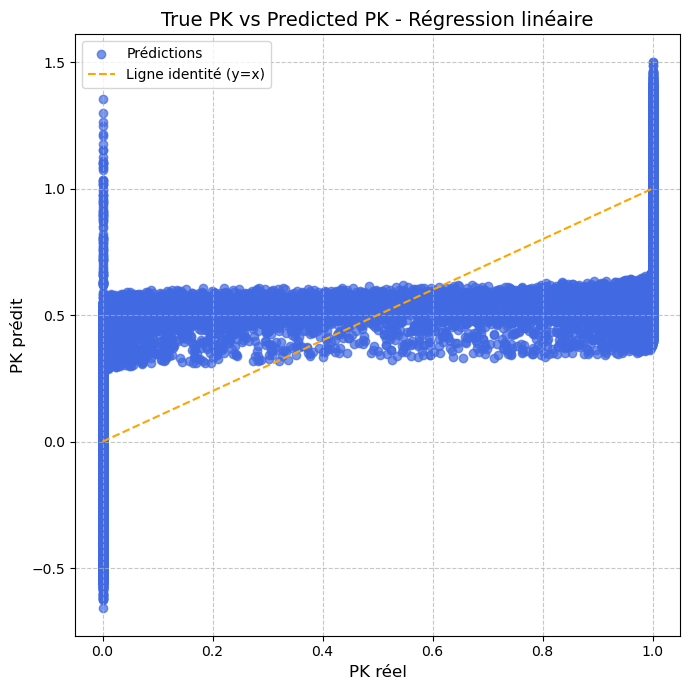

In [95]:
# Graphique True vs Predicted PK pour visualiser la qualité du modèle linéaire
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Régression linéaire", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interprétation du graphique True vs Predicted PK :**

Ce graphique compare les valeurs réelles de PK (axe x) aux valeurs prédites par le modèle de régression linéaire (axe y). La ligne orange en pointillés représente la ligne d'identité (y = x) : un modèle parfait aurait tous ses points alignés sur cette ligne.
Notre graphique montre que le modèle linéaire ne capture pas toute la complexité des données.

Ce graphique permet donc de visualiser les limites du modèle et d’identifier les cas où il sous-estime ou surestime PK.

#### Ridge  & Lasso Regression

In [96]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import time
import sys
import pickle

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Ridge
start_train_ridge = time.time()
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
training_time_ridge = time.time() - start_train_ridge
start_infer_ridge = time.time()
y_ridge_pred = ridge.predict(X_test)
inference_time_ridge = time.time() - start_infer_ridge
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
ridge_size = sys.getsizeof(pickle.dumps(ridge)) / 1024  # en Ko
print("Ridge Coeff:", ridge.coef_)

# Lasso
start_train_lasso = time.time()
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
training_time_lasso = time.time() - start_train_lasso
start_infer_lasso = time.time()
y_lasso_pred = lasso.predict(X_test)
inference_time_lasso = time.time() - start_infer_lasso
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_size = sys.getsizeof(pickle.dumps(lasso)) / 1024  # en Ko


print("Lasso Coeff:", lasso.coef_)
table_result = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [ridge_mse, lasso_mse],
    "R2": [ridge_r2, lasso_r2],
    "Infernce Time":[inference_time_ridge, inference_time_lasso],
    "Training Time":[training_time_ridge, training_time_lasso],
    "Size (Ko)": [ridge_size, lasso_size]
})
print(table_result)

Ridge Coeff: [ 0.15586847 -0.07384187  0.00171828 -0.00090928 -0.0120372   0.1748172 ]
Lasso Coeff: [ 0.         -0.          0.00121837 -0.00040262 -0.01175752  0.0747559 ]
   Model       MSE        R2  Infernce Time  Training Time  Size (Ko)
0  Ridge  0.079140  0.662594       0.003485       0.023742   0.663086
1  Lasso  0.097917  0.582538       0.003904       0.062239   0.750977


### 4.2/ Test polynomial regression. With Ridge regularizer. With Lasso regularizer. 

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import sys
import pickle

df = pd.read_csv(
    "C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv"
)

X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
Y = df[["PK"]]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Ridge
start_train_ridge = time.time()
ridge_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
training_time_ridge = time.time() - start_train_ridge
start_infer_ridge = time.time()
y_ridge_pred = ridge_model.predict(X_test)
inference_time_ridge = time.time() - start_infer_ridge
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
ridge_size = sys.getsizeof(pickle.dumps(ridge_model)) / 1024  # en Ko


# Lasso
start_train_lasso = time.time()
lasso_model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1, max_iter=10000))
lasso_model.fit(X_train, y_train)
training_time_lasso = time.time() - start_train_lasso
start_infer_lasso = time.time()
y_lasso_pred = lasso_model.predict(X_test)
inference_time_lasso = time.time() - start_infer_lasso
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_size = sys.getsizeof(pickle.dumps(lasso_model)) / 1024  # en Ko


table_result = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [ridge_mse, lasso_mse],
    "R2": [ridge_r2, lasso_r2],
    "Size (Ko)": [ridge_size, lasso_size],
    "Infernce Time":[inference_time_ridge, inference_time_lasso],
    "Training Time":[training_time_ridge, training_time_lasso]
})

print(table_result)

   Model       MSE        R2  Size (Ko)  Infernce Time  Training Time
0  Ridge  0.073644  0.686023   1.161133       0.050549       0.241926
1  Lasso  0.080507  0.656766   1.249023       0.045075       1.130672


### Conclusion sur la régression polynomiale (section 4.2)

- Pour un polynôme de degré 2, les scores obtenus sont :
    - **Ridge** : MSE = 0.0736, R² = 0.686
    - **Lasso** : MSE = 0.0805, R² = 0.657
- Ces valeurs montrent que les deux modèles expliquent une partie significative de la variance de PK, mais il reste une marge d’erreur non négligeable.
- Un R² autour de 0.65–0.68 indique que la régression polynomiale capture une tendance, mais n’explique pas toute la complexité des données.
- Le MSE est relativement faible, ce qui montre que les prédictions sont proches des valeurs réelles, mais il peut y avoir des écarts pour certains points.
- **Conclusion** :
    - La régression polynomiale avec Ridge ou Lasso est adaptée pour modéliser la relation entre les variables et PK, mais elle n’est pas parfaite. Il peut être utile d’explorer d’autres modèles (arbres, réseaux de neurones) ou d’optimiser les paramètres pour améliorer la performance.
    - Ridge donne des résultats légèrement meilleurs que Lasso dans ce cas.
    

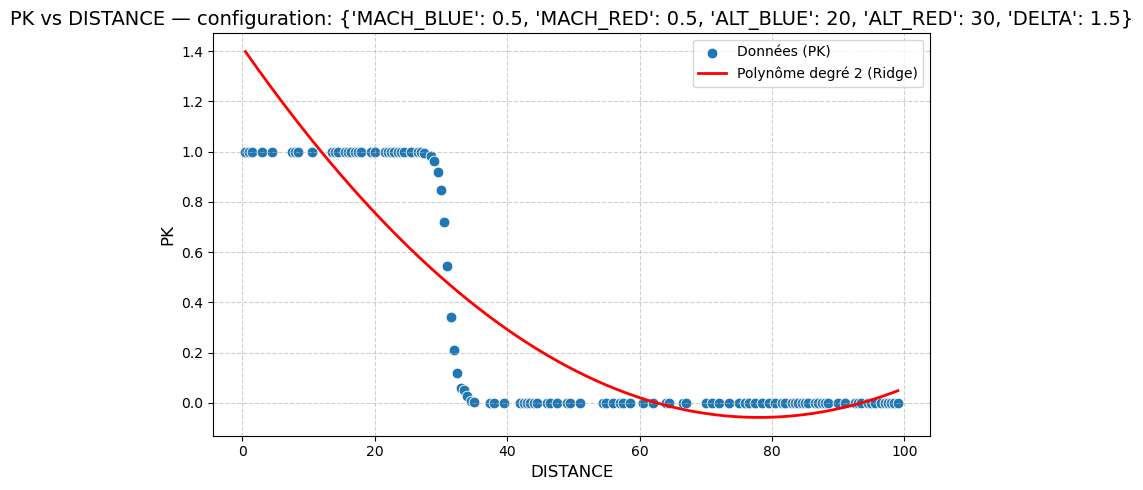

Nombre de points: 110
MSE sur ces points: 0.044335186440962515
R2 sur ces points: 0.7892180344110988


In [98]:
# Superposer un polynôme (par défaut degré=2) à PK vs DISTANCE pour une configuration donnée
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Choisir une configuration fixe (modifiable)
config = {
    'MACH_BLUE': 0.5,
    'MACH_RED': 0.5,
    'ALT_BLUE': 20,
    'ALT_RED': 30,
    'DELTA': 1.5
}

degree = 2  # degré du polynôme; change si besoin
alpha = 1.0  # régularisation pour Ridge (stabilité)

# Filtrer les données pour la configuration choisie
subset = df[
    (df['MACH_BLUE'] == config['MACH_BLUE']) &
    (df['MACH_RED'] == config['MACH_RED']) &
    (df['ALT_BLUE'] == config['ALT_BLUE']) &
    (df['ALT_RED'] == config['ALT_RED']) &
    (df['DELTA'] == config['DELTA'])
].copy()

# Si peu de points, avertir
if subset.shape[0] < 5:
    print(f"Attention: seulement {subset.shape[0]} points pour la configuration choisie. Considérer d'élargir le filtre.")

# Préparer X (DISTANCE) et y (PK)
X_dist = subset['DISTANCE'].values.reshape(-1,1)
y_pk = subset['PK'].values.reshape(-1,1)

# Trier par distance pour une courbe lisse
order = np.argsort(X_dist.flatten())
X_sorted = X_dist[order]
y_sorted = y_pk[order]

# Ajuster le modèle polynomial avec régularisation Ridge
model_poly = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), Ridge(alpha=alpha))
model_poly.fit(X_sorted, y_sorted)

# Prédire sur une grille fine
X_grid = np.linspace(X_sorted.min(), X_sorted.max(), 200).reshape(-1,1)
y_grid = model_poly.predict(X_grid)

# Tracé : points + courbe du polynôme
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_sorted.flatten(), y=y_sorted.flatten(), s=60, color='tab:blue', label='Données (PK)')
plt.plot(X_grid.flatten(), y_grid.flatten(), color='red', linewidth=2, label=f'Polynôme degré {degree} (Ridge)')
plt.xlabel('DISTANCE', fontsize=12)
plt.ylabel('PK', fontsize=12)
plt.title(f'PK vs DISTANCE — configuration: {config}', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Afficher quelques informations sur le fit
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = model_poly.predict(X_sorted)
print('Nombre de points:', X_sorted.shape[0])
print('MSE sur ces points:', mean_squared_error(y_sorted, y_pred_train))
print('R2 sur ces points:', r2_score(y_sorted, y_pred_train))

### 4.3/  Test Decision tree regression. Test Random Forest regression. 

           Model       MSE        R2      Size (Ko)  Inference Time  \
0  Decision Tree  0.050171  0.786099       5.600586        0.008099   
1  Random Forest  0.003405  0.985484  408695.416992        0.802958   

   Training Time  
0       0.356837  
1      32.378979  


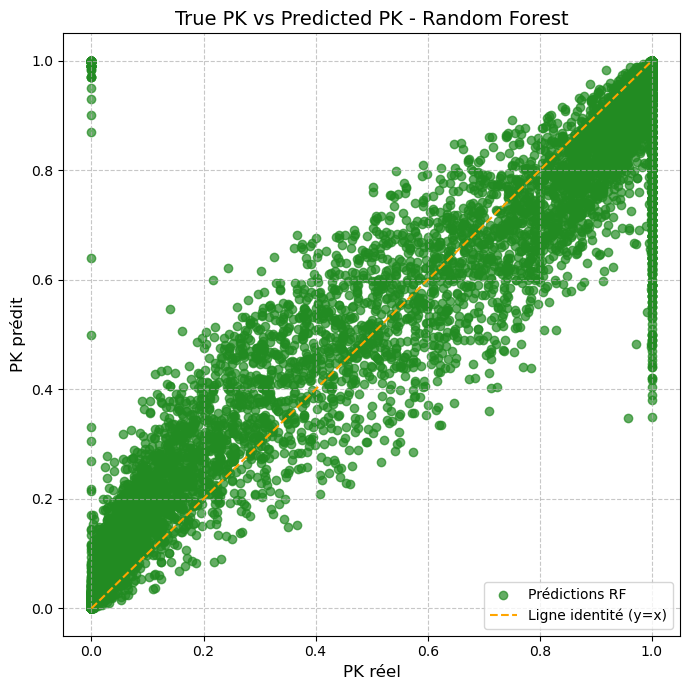

In [ ]:
# Test Decision Tree Regression et Random Forest Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import time
import sys

# Random Forest Regression
start_train_rf = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())
training_time_rf = time.time() - start_train_rf
start_infer_rf = time.time()
y_rf_pred = rf.predict(X_test)
inference_time_rf = time.time() - start_infer_rf
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
rf_size = sys.getsizeof(pickle.dumps(rf)) / 1024  # en Ko

# Affichage des résultats
table_result = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "MSE": [tree_mse, rf_mse],
    "R2": [tree_r2, rf_r2],
    "Size (Ko)": [tree_size, rf_size],
    "Inference Time": [inference_time_tree, inference_time_rf],
    "Training Time": [training_time_tree, training_time_rf]
})
print(table_result)

# Graphique True vs Predicted pour Random Forest
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_rf_pred, alpha=0.7, color='forestgreen', label='Prédictions RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Random Forest", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


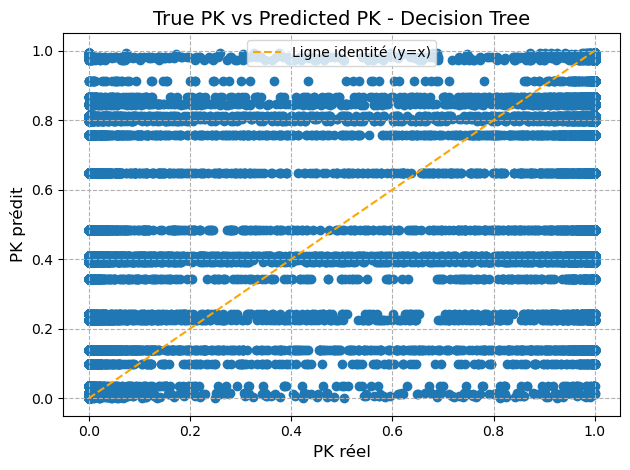

           Model       MSE        R2      Size (Ko)  Inference Time  \
0  Decision Tree  0.050171  0.786099       5.600586        0.007853   
1  Random Forest  0.003405  0.985484  408695.416992        0.802958   

   Training Time  
0       0.334023  
1      32.378979  


In [115]:
# Test Decision Tree Regression et Random Forest Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import time
import sys
import pickle

df= pd.read_csv(
    "C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv"
)
X= df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
Y= df['PK']   

# Préparation des données
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Decision Tree Regression
start_train_tree = time.time()
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
training_time_tree = time.time() - start_train_tree
start_infer_tree = time.time()
y_tree_pred = tree.predict(X_test)
inference_time_tree = time.time() - start_infer_tree
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)
tree_size = sys.getsizeof(pickle.dumps(tree)) / 1024  # en Ko

# Graphique True vs Predicted pour Decision Tree
plt.figure()
plt.scatter(y_test, y_tree_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Decision Tree", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

table_result = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "MSE": [tree_mse, rf_mse],
    "R2": [tree_r2, rf_r2],
    "Size (Ko)": [tree_size, rf_size],
    "Inference Time": [inference_time_tree, inference_time_rf],
    "Training Time": [training_time_tree, training_time_rf]
})
print(table_result)

In [101]:
# Test Decision Tree Classifier et Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pour la classification, il faut des labels binaires ou catégoriels.
# Exemple : classifier PK en deux classes (succès/échec) selon un seuil
pk_threshold = 0.5
y_class = (Y["PK"] > pk_threshold).astype(int)

X_train_c, X_test_c = train_test_split(X, test_size=0.2, random_state=42)
y_train_c, y_test_c = train_test_split(y_class, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train_c, y_train_c)
y_tree_pred = tree_clf.predict(X_test_c)
acc_tree = accuracy_score(y_test_c, y_tree_pred)
print("Decision Tree Classifier Accuracy:", acc_tree)
print("Classification report (Decision Tree):\n", classification_report(y_test_c, y_tree_pred))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train_c, y_train_c.values.ravel())
y_rf_pred = rf_clf.predict(X_test_c)
acc_rf = accuracy_score(y_test_c, y_rf_pred)
print("Random Forest Classifier Accuracy:", acc_rf)
print("Classification report (Random Forest):\n", classification_report(y_test_c, y_rf_pred))

Decision Tree Classifier Accuracy: 0.9143574111706386
Classification report (Decision Tree):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     36701
           1       0.94      0.86      0.90     28255

    accuracy                           0.91     64956
   macro avg       0.92      0.91      0.91     64956
weighted avg       0.92      0.91      0.91     64956

Random Forest Classifier Accuracy: 0.9238715438142743
Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     36701
           1       0.92      0.90      0.91     28255

    accuracy                           0.92     64956
   macro avg       0.92      0.92      0.92     64956
weighted avg       0.92      0.92      0.92     64956



### 4.4/  Gradient Boosting

              Model       MSE        R2  Training Time (s)  \
0  GradientBoosting  0.037318  0.840896          35.319279   

   Inference Time (s)   Size (KB)  
0            0.192152  264.383789  


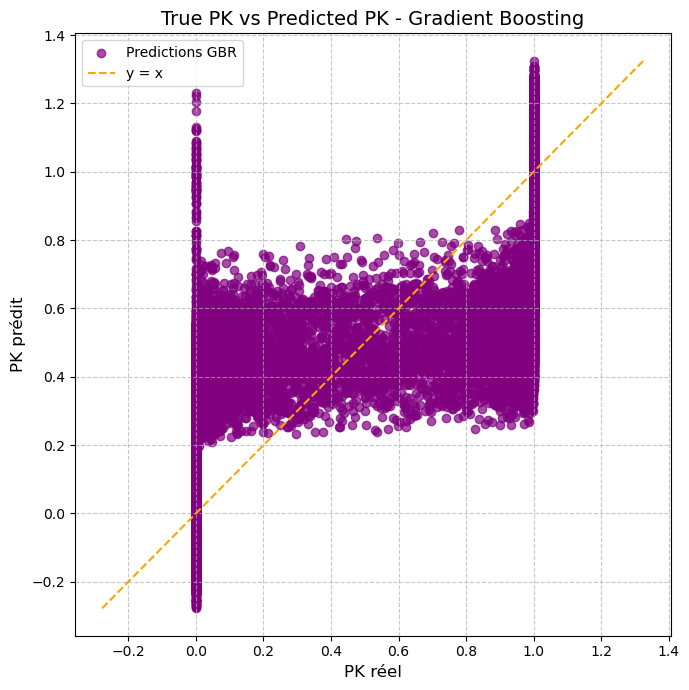

C:\Users\khali\AppData\Local\Temp\ipykernel_17248\2697578578.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')


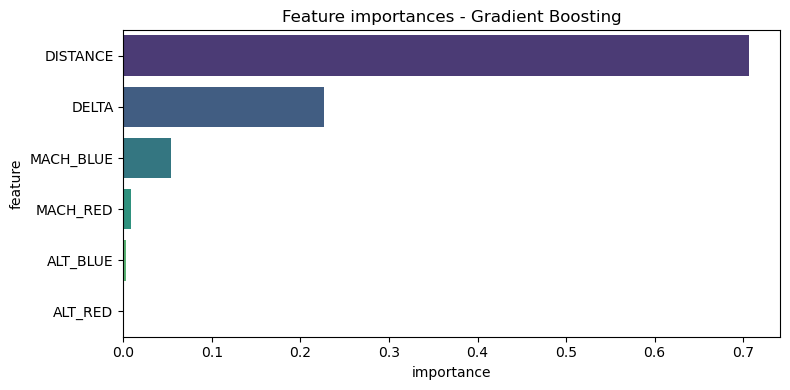

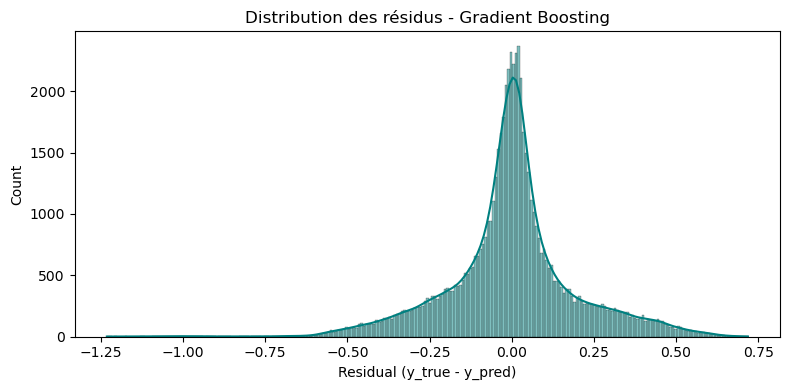

Gradient Boosting: MSE=0.03732, R2=0.841, training_time=35.319s, inference_time=0.19215s, size_kb=264.38


In [ ]:
# Gradient Boosting Regressor: entraînement, évaluation et diagnostics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Préparation des données (utiliser X, Y définis précédemment)
# Si X, Y ne sont pas dans le scope, recharger rapidement
try:
    X.shape
except NameError:
    df = pd.read_csv("C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv")
    X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
    Y = df['PK']
    from sklearn.model_selection import train_test_split
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
    y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Instantiate the model with reasonable defaults; these can be tuned
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Training
start_train = time.time()
gbr.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_train

# Inference
start_infer = time.time()
y_gbr_pred = gbr.predict(X_test)
inference_time = time.time() - start_infer

# Metrics
gbr_mse = mean_squared_error(y_test, y_gbr_pred)
gbr_r2 = r2_score(y_test, y_gbr_pred)
gbr_size_kb = sys.getsizeof(pickle.dumps(gbr)) / 1024

# Print results in a small table
results = pd.DataFrame({
    'Model': ['GradientBoosting'],
    'MSE': [gbr_mse],
    'R2': [gbr_r2],
    'Training Time (s)': [training_time],
    'Inference Time (s)': [inference_time],
    'Size (KB)': [gbr_size_kb]
})
print(results)

# True vs Predicted plot
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_gbr_pred, alpha=0.7, color='purple', label='Predictions GBR')
min_val = min(y_test.min().values, y_gbr_pred.min())
max_val = max(y_test.max().values, y_gbr_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linestyle='--', label='y = x')
plt.xlabel('PK réel', fontsize=12)
plt.ylabel('PK prédit', fontsize=12)
plt.title('True PK vs Predicted PK - Gradient Boosting', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Feature importances
feat_names = X.columns if hasattr(X, 'columns') else [f'X{i}' for i in range(X.shape[1])]
importances = gbr.feature_importances_
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')
plt.title('Feature importances - Gradient Boosting')
plt.tight_layout()
plt.show()

# Residuals histogram
residuals = y_test.values.flatten() - y_gbr_pred.flatten()
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, color='teal')
plt.title('Distribution des résidus - Gradient Boosting')
plt.xlabel('Residual (y_true - y_pred)')
plt.tight_layout()
plt.show()

# Option: print a short diagnostic summary
print(f'Gradient Boosting: MSE={gbr_mse:.5f}, R2={gbr_r2:.3f}, training_time={training_time:.3f}s, inference_time={inference_time:.5f}s, size_kb={gbr_size_kb:.2f}')

In [114]:
# Parcourir les valeurs discrètes possibles pour chaque paramètre et effectuer le fit sigmoïde (sans plots)
# Remplacement de itertools.product par 5 boucles for imbriquées (plus explicite)
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]


Y = df['PK']

def sigmoid(d0 , d, k):
    return 1 / (1 + np.exp(-k * (d - d0)))

df_prime = pd.DataFrame(columns=['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED', 'DELTA', 'd0', 'k'])
new_rows = []

for x_1 in [0.5, 1.0, 1.5, 2.0]:
    for x_2 in [0.5, 1.0, 1.5, 2.0]:
        for x_3 in [0, 10, 20, 30, 40]:
            for x_4 in [0, 10, 20, 30, 40]:
                for delta in [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3]:
                             mask = ((df['MACH_BLUE'] == x_1) & (df['MACH_RED'] == x_2) &
                                     (df['ALT_BLUE'] == x_3) &
                                     (df['ALT_RED'] == x_4) &
                                     (df['DELTA'] == delta))
                X_f = X[mask]
                Y_f = Y[mask]
                d_values = X_f['DISTANCE'].values
                y_values = Y_f.values

                # fit of the d0 and k 
                popt, _ = curve_fit(sigmoid, d_values, y_values, p0=[np.median(d_values), 0]) # initial values

                d0, k = popt
                new_rows.append({'MACH_BLUE': x_1,'MACH_RED': x_2,'ALT_BLUE': x_3,'ALT_RED': x_4,'DELTA': delta,'d0': d0,'k': k})

df_prime = pd.DataFrame(new_rows)

df_prime.head()


,MACH_BLUE,MACH_RED,ALT_BLUE,ALT_RED,DELTA,d0,k
0,0.5,0.5,0,0,3,67.400049,1.475537
1,0.5,0.5,0,10,3,66.359601,1.517945
2,0.5,0.5,0,20,3,65.349261,1.472616
3,0.5,0.5,0,30,3,64.322080,1.539747
4,0.5,0.5,0,40,3,63.272694,1.519809


In [ ]:
X = df_prime[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DELTA"]]
Y = df_prime['d0']

## Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle   

X = df_prime[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DELTA"]]
Y = df_prime['d0']
model = LinearRegression()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

import time
start_train = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_train


start_time = time.time()
y_pred = model.predict(X_test)
inference_time = time.time() - start_time


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

size_bytes = sys.getsizeof(pickle.dumps(model))




table_result = pd.DataFrame({
    "Model": ["Linear Regression"], 
    "MSE": [mse],   
    "R2": [r2],
    "Infernce Time":[inference_time],   
    "Training Time":[training_time],
    "Size (bytes)":[size_bytes]
})
print(table_result)


               Model       MSE        R2  Infernce Time  Training Time  \
0  Linear Regression  0.000252  0.999998       0.003332       0.046701   

   Size (bytes)  
0           656  


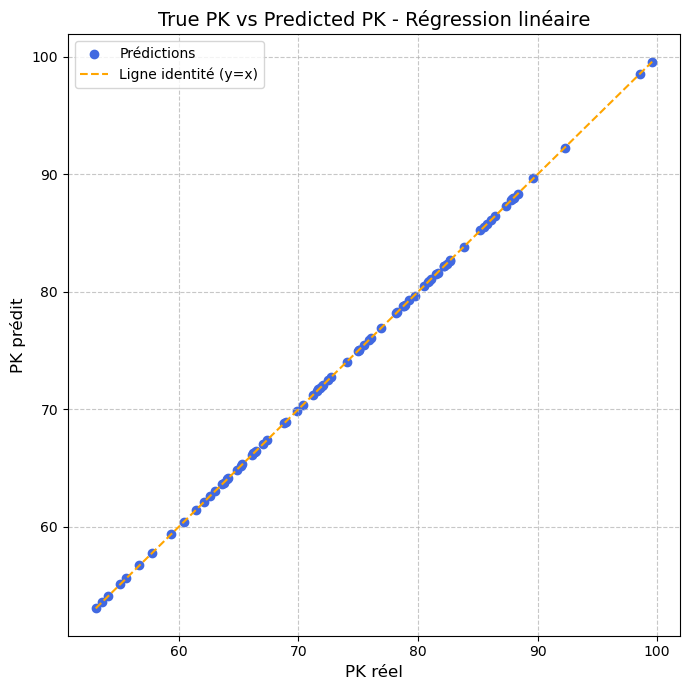

In [117]:
# Graphique True vs Predicted PK pour visualiser la qualité du modèle linéaire
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, color='royalblue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Régression linéaire", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Lasso Regretion 


Ridge Coeff: [17.1512326  -7.43194722  0.15547661 -0.10196531  0.        ]


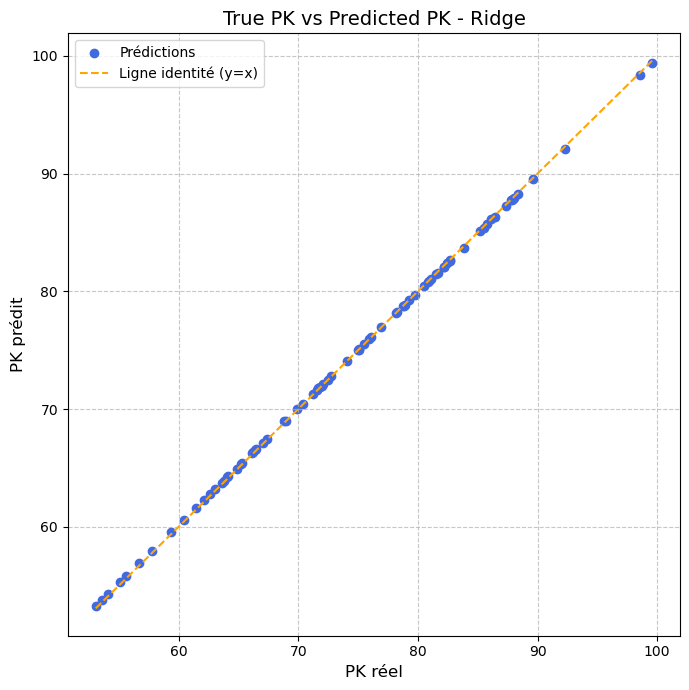

Lasso Coeff: [17.00923156 -7.19252826  0.15461457 -0.10141612  0.        ]


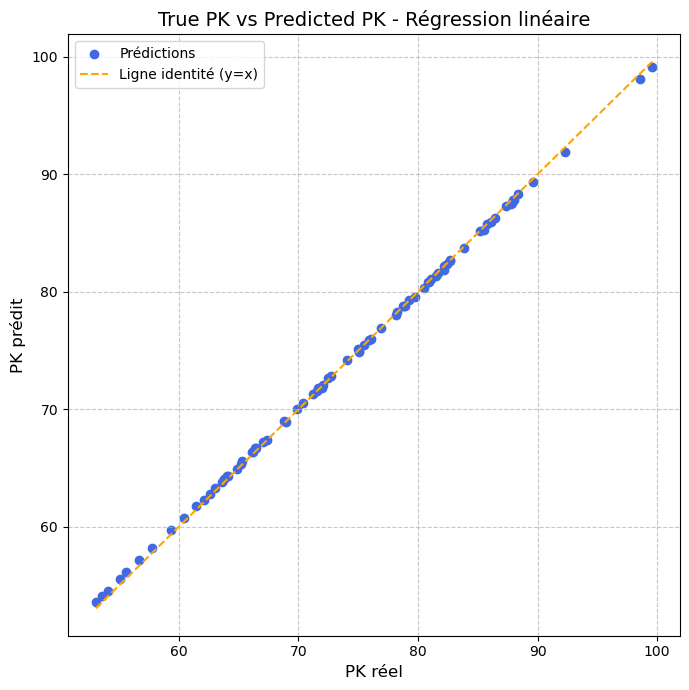

   Model       MSE        R2  Infernce Time  Training Time  Size (Ko)
0  Ridge  0.011234  0.999902       0.002252       0.020147   0.636719
1  Lasso  0.055774  0.999514       0.003397       0.025916   0.713867


In [118]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import time
import sys
import pickle

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Ridge
start_train_ridge = time.time()
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
training_time_ridge = time.time() - start_train_ridge
start_infer_ridge = time.time()
y_ridge_pred = ridge.predict(X_test)
inference_time_ridge = time.time() - start_infer_ridge
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
ridge_size = sys.getsizeof(pickle.dumps(ridge)) / 1024  # en Ko
print("Ridge Coeff:", ridge.coef_)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_ridge_pred, color='royalblue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Ridge", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Lasso
start_train_lasso = time.time()
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
training_time_lasso = time.time() - start_train_lasso
start_infer_lasso = time.time()
y_lasso_pred = lasso.predict(X_test)
inference_time_lasso = time.time() - start_infer_lasso
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_size = sys.getsizeof(pickle.dumps(lasso)) / 1024  # en Ko


print("Lasso Coeff:", lasso.coef_)
table_result = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [ridge_mse, lasso_mse],
    "R2": [ridge_r2, lasso_r2],
    "Infernce Time":[inference_time_ridge, inference_time_lasso],
    "Training Time":[training_time_ridge, training_time_lasso],
    "Size (Ko)": [ridge_size, lasso_size]
})

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_lasso_pred, color='royalblue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Ligne identité (y=x)')
plt.xlabel("PK réel", fontsize=12)
plt.ylabel("PK prédit", fontsize=12)
plt.title("True PK vs Predicted PK - Régression linéaire", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(table_result)

## Remarque générales et commentaires sur les differentes metrics

- Minimiser MSE loss 

Quels sont les metrics interessant ?
On a 2 sigmoide qui n'ont pas les mêmes "half PK distance" 
2 metrics distance entre d0_true et d0_predict --> MAE pour tout le dataset
On peut aussi regarder la distribution stat de notre MAE qui est plus intéressant et permet de rendre compte de la distribution stat de notre erreur.

On peut aussi diviser : MAE/true(d0) ce qui correspond à l'erreur absolue "RELATIVE"
- Exemple : une erreur de 2km sur le half PK peut avoir un impact différents (2% sur un d0_true de 100km mais 20% sur d0_true 10km)




# TASK 3: Unsupervised Learning

## 1

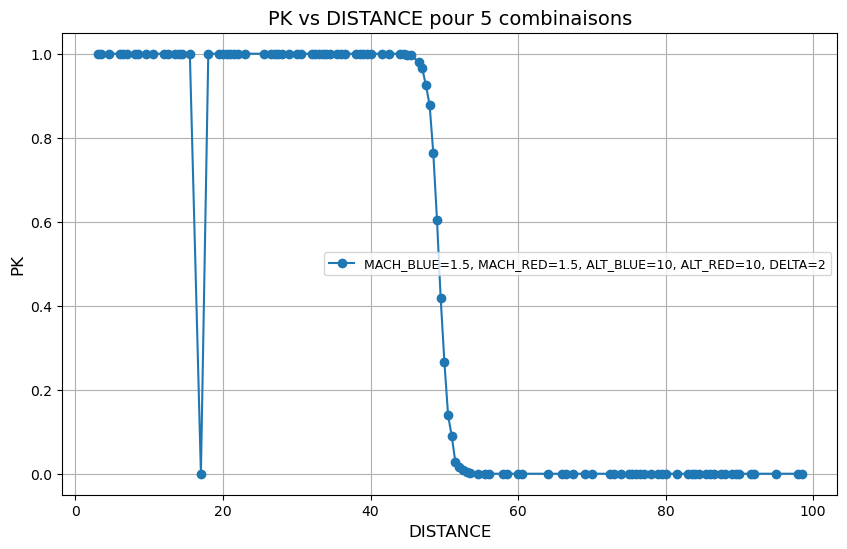

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 5 combinaisons choisies
combinations = [
    (1.5, 1.5, 10, 10, 2),
    #(0.5, 1, 10, 20, 1.0),
    #(1, 1.5, 20, 30, 1.5),
    #(1.5, 2, 30, 40, 2.0),
    #(2, 0.5, 40, 10, 2.5)
]

for x1, x2, x3, x4, delta in combinations:
    subset = df[
        (df["MACH_BLUE"] == x1) &
        (df["MACH_RED"] == x2) &
        (df["ALT_BLUE"] == x3) &
        (df["ALT_RED"] == x4) &
        (df["DELTA"] == delta)
    ]
    if not subset.empty:
        plt.plot(
            subset["DISTANCE"],
            subset["PK"],
            marker="o",
            label=f"MACH_BLUE={x1}, MACH_RED={x2}, ALT_BLUE={x3}, ALT_RED={x4}, DELTA={delta}"
        )

plt.xlabel("DISTANCE", fontsize=12)
plt.ylabel("PK", fontsize=12)
plt.legend(fontsize=9)
plt.title("PK vs DISTANCE pour 5 combinaisons", fontsize=14)
plt.grid(True)
plt.show()


## Unsupervised learning on X = [MACH_BLUE, MACH_RED, ALT_BLUE, ALT_RED, DISTANCE, DELTA, PK]

In [12]:
X = df[['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED', 'DISTANCE', 'DELTA', 'PK']]
X.head()

,MACH_BLUE,MACH_RED,ALT_BLUE,ALT_RED,DISTANCE,DELTA,PK
0,0.5,0.5,0,0,1.0,0.0,1.0
1,0.5,0.5,0,0,1.5,0.0,1.0
2,0.5,0.5,0,0,2.0,0.0,1.0
3,0.5,0.5,0,0,3.0,0.0,1.0
4,0.5,0.5,0,0,3.5,0.0,1.0


### Isolation forest

Nombre de points anormaux détectés (IF) : 11


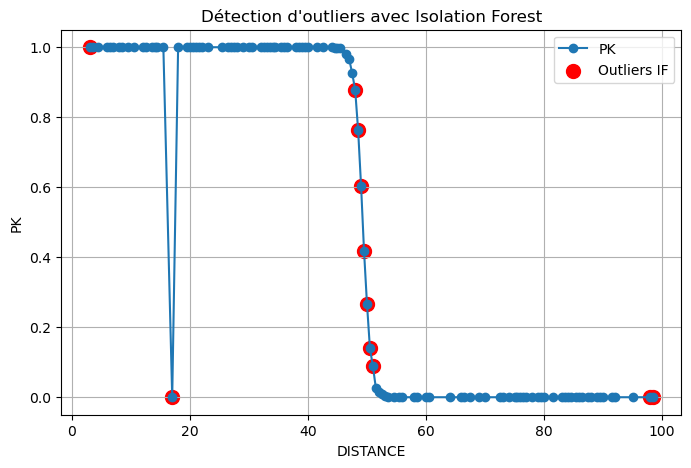

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Sélection du subset
subset = df[
    (df["MACH_BLUE"] == 1.5) &
    (df["MACH_RED"] == 1.5) &
    (df["ALT_BLUE"] == 10) &
    (df["ALT_RED"] == 10) &
    (df["DELTA"] == 2)
]

X = subset[["DISTANCE", "PK"]].values

# Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
outliers_if = iforest.fit_predict(X)  # -1 = outlier, 1 = inlier

print("Nombre de points anormaux détectés (IF) :", np.sum(outliers_if == -1))

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(subset["DISTANCE"], subset["PK"], marker="o", label="PK")

indices_outliers = np.where(outliers_if == -1)[0]
if len(indices_outliers) > 0:
    plt.scatter(
        subset["DISTANCE"].iloc[indices_outliers],
        subset["PK"].iloc[indices_outliers],
        color="red", s=100, label="Outliers IF"
    )

plt.xlabel("DISTANCE")
plt.ylabel("PK")
plt.title("Détection d'outliers avec Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()


### Local Outlier factor

Nombre de points anormaux détectés: 2


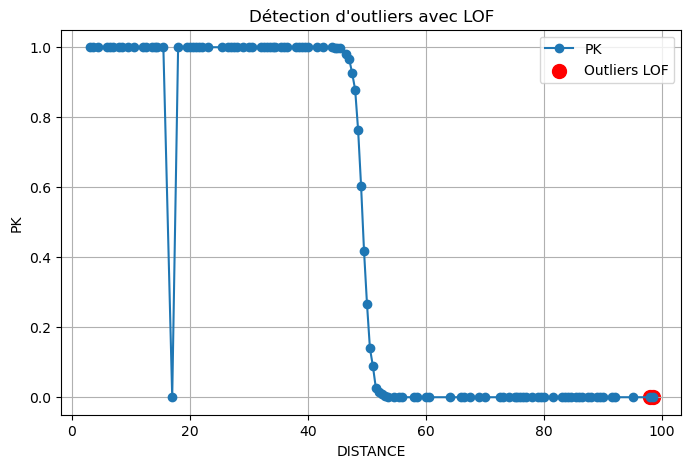

In [39]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers = lof.fit_predict(X)
print("Nombre de points anormaux détectés:", np.sum(outliers == -1))

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(subset["DISTANCE"], subset["PK"], marker="o", label="PK")
plt.scatter(
    subset["DISTANCE"].iloc[np.where(outliers == -1)[0]],
    subset["PK"].iloc[np.where(outliers == -1)[0]],
    color="red", s=100, label="Outliers LOF"
)
plt.xlabel("DISTANCE")
plt.ylabel("PK")
plt.title("Détection d'outliers avec LOF")
plt.legend()
plt.grid(True)
plt.show()




### Conclusion 
Nous pouvons expliquer les résultats obtenus (5x plus de outlier trouvés avec la méthode LOF) par le fait que : 
- LOF detecte des outliers locaux
- Isolation forest detecte des outliers globaux (points aberrants)



#### Remarque : 
 **La contamination** = la proportion estimée d’outliers dans ton dataset.

Exemple : contamination = 0.05 → on suppose qu’environ 5% des données sont des anomalies.

L’algorithme utilise ce paramètre pour fixer un seuil de décision entre "normal" et "anormal".7

C'est d'ailleur dans ce contexte que lorsque que **contamination_LOF**  : 5% --> 1%, on a **outlier_LOF** = **outlier_IF**
En effet, LOF choisira exactement 1% (au lieu de 5%) des points comme anomalies (en triant les scores du plus suspect au moins suspect)

## DBSCAN

Nombre de points anormaux détectés: 111


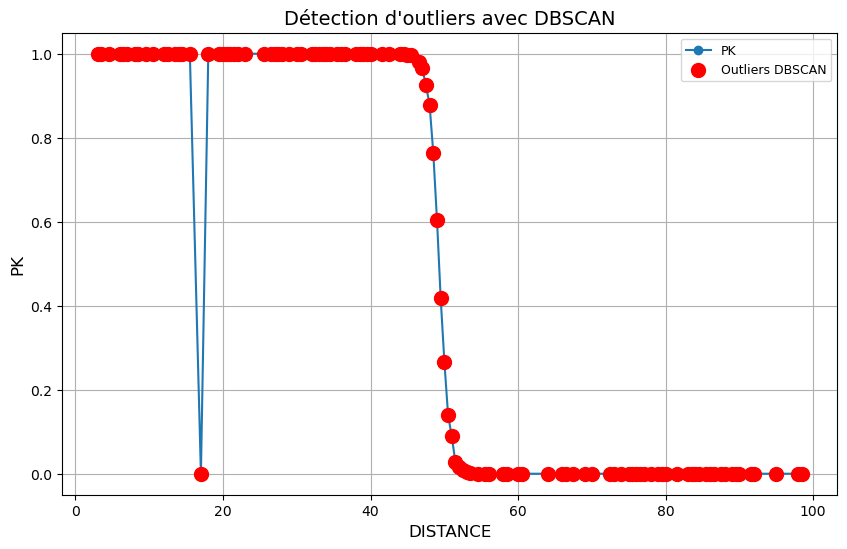

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# subset choisi
subset = df[
    (df["MACH_BLUE"] == 1.5) &
    (df["MACH_RED"] == 1.5) &
    (df["ALT_BLUE"] == 10) &
    (df["ALT_RED"] == 10) &
    (df["DELTA"] == 2)
]

X = subset[["DISTANCE", "PK"]].values

# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
outliers = dbscan.fit_predict(X)

print("Nombre de points anormaux détectés:", np.sum(outliers == -1))

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(subset["DISTANCE"], subset["PK"], marker="o", label="PK")

# Marquer les outliers détectés
plt.scatter(
    subset["DISTANCE"].iloc[np.where(outliers == -1)[0]],
    subset["PK"].iloc[np.where(outliers == -1)[0]],
    color="red", s=100, label="Outliers DBSCAN", zorder=5
)

plt.xlabel("DISTANCE", fontsize=12)
plt.ylabel("PK", fontsize=12)
plt.title("Détection d'outliers avec DBSCAN", fontsize=14)
plt.legend(fontsize=9)
plt.grid(True)
plt.show()


#### Choix eps

Methode : 
Étapes :

- Calculer la distance entre chaque point et son k‑ème plus proche voisin, avec 

- k=min_samples−1.

- Trier ces distances par ordre croissant.

- Tracer la courbe de ces distances : k-distance graph.

- Repérer le coude (point d’inflexion) de la courbe → valeur optimale pour eps.

Le point d’inflexion correspond au passage entre ces deux zones.

Avant le point d’inflexion → distances petites → points dans un cluster.

Après le point d’inflexion → distances beaucoup plus grandes → points isolés.

En choisissant eps = distance au point d’inflexion :

On maximise la détection des clusters.

On minimise la fusion de clusters et le bruit incorrectement classé comme cluster.

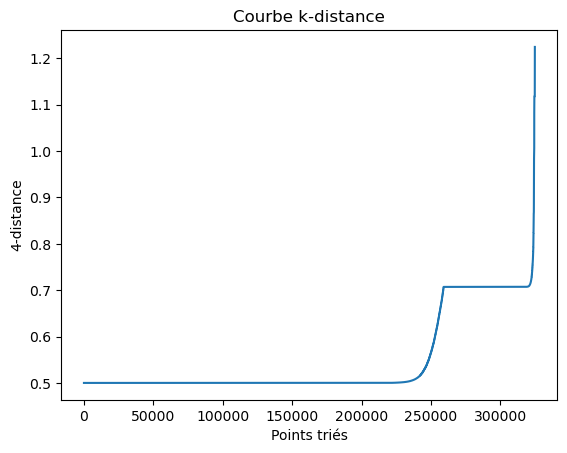

In [29]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 4  # min_samples = k + 1
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances[:, k-1])
plt.plot(distances)
plt.xlabel("Points triés")
plt.ylabel(f"{k}-distance")
plt.title("Courbe k-distance")
plt.show()


# 3/ Détection d'outliers par encadrement dans PK = f(DISTANCE)

Dans ce notebook, nous allons appliquer une méthode simple pour détecter les **outliers** dans une série binaire `PK` (valeurs 0 ou 1) en fonction de la distance.  
L'idée est de repérer les points qui sont **entourés par des valeurs identiques mais différents eux-mêmes**.  

---

## 1. Principe

Soit une séquence \( PK(n) \) :

- Si \( PK(n-1) = PK(n+1) \) **et** \( PK(n) \neq PK(n-1) \), alors le point \( n \) est considéré comme un **outlier par encadrement**.

**Exemples :**

| Indices | PK(n-1) | PK(n) | PK(n+1) | Outlier ? |
|---------|---------|-------|---------|-----------|
| n       | 1       | 0     | 1       | Oui       |
| n       | 0       | 1     | 0       | Oui       |
| n       | 1       | 1     | 1       | Non       |

---

## 2. Implémentation

On parcourt la série PK en ignorant les points en bordure (pas d'encadrement possible) et on applique la règle ci-dessus.  
Les points identifiés comme outliers sont stockés dans une liste.

```python
def outliers_par_encadrement(pk):
    """
    Détecte les outliers par encadrement dans une séquence binaire.
    
    Arguments :
    pk -- liste ou array de valeurs 0 ou 1.
    
    Retour :
    Liste des indices considérés comme outliers.
    """
    pk = np.array(pk)
    outliers = []
    for i in range(1, len(pk) - 1):
        if pk[i-1] == pk[i+1] and pk[i] != pk[i-1]:
            outliers.append(i)
    return outliers


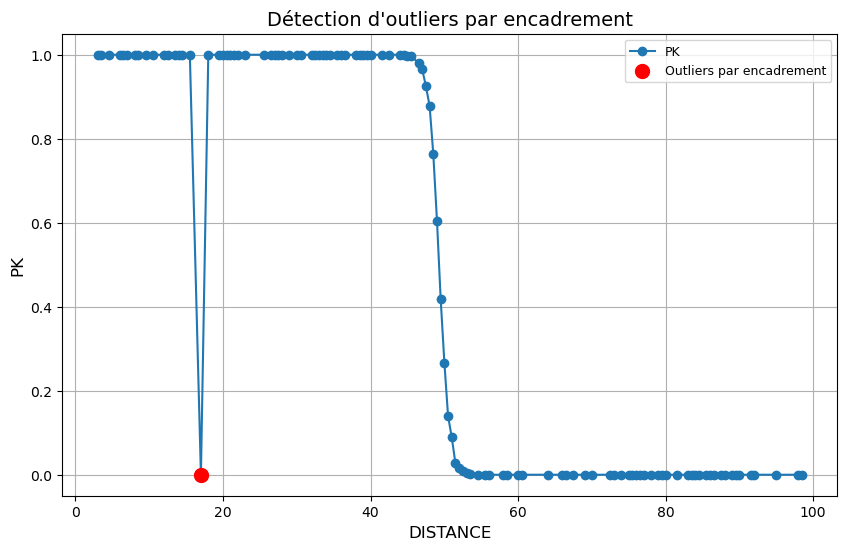

Indices détectés comme outliers : [16]
Distances correspondantes : [17.]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Extraire les données de ta combinaison choisie
subset = df[
    (df["MACH_BLUE"] == 1.5) &
    (df["MACH_RED"] == 1.5) &
    (df["ALT_BLUE"] == 10) &
    (df["ALT_RED"] == 10) &
    (df["DELTA"] == 2)
]

distances = subset["DISTANCE"].values
pk_values = subset["PK"].values

def outliers_par_encadrement(pk):
    pk = np.array(pk)
    outliers = []
    for i in range(1, len(pk) - 1):
        if pk[i-1] == pk[i+1] and pk[i] != pk[i-1]:
            outliers.append(i)
    return outliers

# Détection des outliers
indices_outliers = outliers_par_encadrement(pk_values)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(distances, pk_values, marker="o", label="PK")
plt.scatter(distances[indices_outliers], pk_values[indices_outliers],
            color="red", s=100, label="Outliers par encadrement", zorder=5)

plt.xlabel("DISTANCE", fontsize=12)
plt.ylabel("PK", fontsize=12)
plt.title("Détection d'outliers par encadrement", fontsize=14)
plt.legend(fontsize=9)
plt.grid(True)
plt.show()

print("Indices détectés comme outliers :", indices_outliers)
print("Distances correspondantes :", distances[indices_outliers])


Indices des outliers : [16, 17, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]


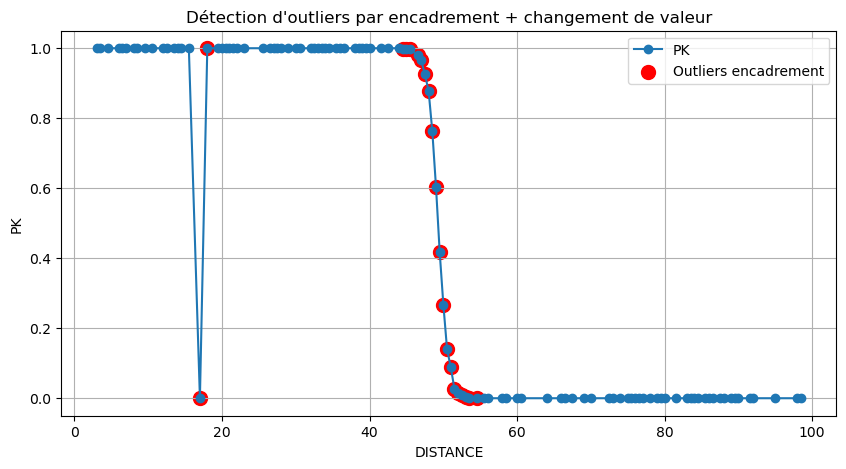

In [45]:
import numpy as np
import pandas as pd

# Supposons que 'PK' est ta série f(n) et 'DISTANCE' ton index
f = subset["PK"].values

outliers = []

for i in range(1, len(f) - 1):
    # Condition encadrement
    if (f[i-1] == 1 and f[i+1] == 1 and f[i] == 0) or \
       (f[i-1] == 0 and f[i+1] == 0 and f[i] == 1):
        outliers.append(i)
    # Condition changement de valeur
    elif f[i] != f[i-1]:
        outliers.append(i)

# Résultat : indices des outliers
print("Indices des outliers :", outliers)

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(subset["DISTANCE"], f, marker="o", label="PK")
plt.scatter(
    subset["DISTANCE"].iloc[outliers],
    f[outliers],
    color="red", s=100, label="Outliers encadrement"
)
plt.xlabel("DISTANCE")
plt.ylabel("PK")
plt.title("Détection d'outliers par encadrement + changement de valeur")
plt.legend()
plt.grid(True)
plt.show()


## Cleaning dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Sélection du subset
data_dirty = df[['ALT_BLUE', 'ALT_RED', 'MACH_BLUE', 'MACH_RED', 'DELTA', 'DISTANCE', 'PK' ]]

X = data_dirty[["DISTANCE", "PK"]].values

# Isolation Forest
iforest = IsolationForest(contamination=0.0001, random_state=42)
outliers_if = iforest.fit_predict(X)  # -1 = outlier, 1 = inlier

print("Nombre de points anormaux détectés (IF) :", np.sum(outliers_if == -1))

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(data_dirty["DISTANCE"], data_dirty["PK"], marker="o", label="PK")

indices_outliers = np.where(outliers_if == -1)[0]
if len(indices_outliers) > 0:
    plt.scatter(
        data_dirty["DISTANCE"].iloc[indices_outliers],
        data_dirty["PK"].iloc[indices_outliers],
        color="red", s=100, label="Outliers IF"
    )

plt.xlabel("DISTANCE")
plt.ylabel("PK")
plt.title("Détection d'outliers avec Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df' is not defined

C:\Users\khali\AppData\Local\Temp\ipykernel_10896\4157138905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dirty["is_outlier_IF"] = (outliers_if == -1)


Taille avant nettoyage : 324780
Taille après nettoyage : 292303


c:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


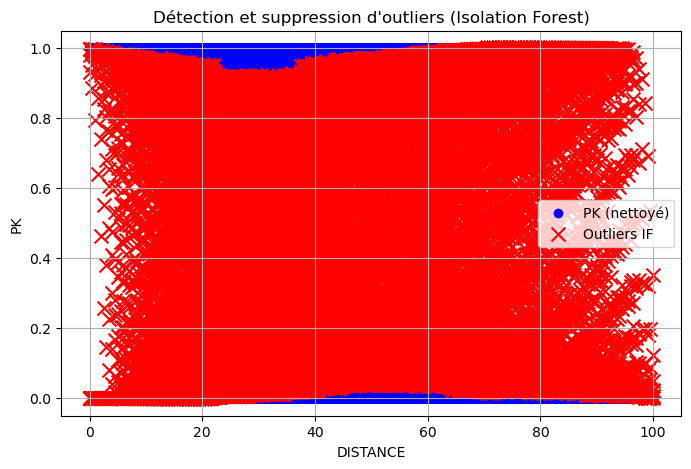

In [60]:
#  Création d'une colonne "is_outlier" dans le subset
data_dirty["is_outlier_IF"] = (outliers_if == -1)

# ✅ Dataset nettoyé (sans les outliers)
data_clean = data_dirty[~data_dirty["is_outlier_IF"]].copy()

print("Taille avant nettoyage :", len(data_dirty))
print("Taille après nettoyage :", len(data_clean))

# Tracé uniquement en points
plt.figure(figsize=(8, 5))

# Données propres (points bleus)
plt.scatter(data_clean["DISTANCE"], data_clean["PK"], color="blue", label="PK (nettoyé)")

# Outliers (points rouges)
plt.scatter(
    data_dirty.loc[data_dirty["is_outlier_IF"], "DISTANCE"],
    data_dirty.loc[data_dirty["is_outlier_IF"], "PK"],
    color="red", s=100, label="Outliers IF", marker="x"
)

plt.xlabel("DISTANCE")
plt.ylabel("PK")
plt.title("Détection et suppression d'outliers (Isolation Forest)")
plt.legend()
plt.grid(True)
plt.show()

### Bonus question: do the supervised learning methods we tested on TASK 2 work better with the cleaned dataset? 

In [ ]:
clean_subset.head()



,MACH_BLUE,MACH_RED,ALT_BLUE,ALT_RED,DELTA,DISTANCE,PK,is_outlier_IF
208116,1.5,1.5,10,10,2.0,3.5,1.0,False
208117,1.5,1.5,10,10,2.0,4.5,1.0,False
208118,1.5,1.5,10,10,2.0,6.0,1.0,False
208119,1.5,1.5,10,10,2.0,6.5,1.0,False
208120,1.5,1.5,10,10,2.0,7.0,1.0,False


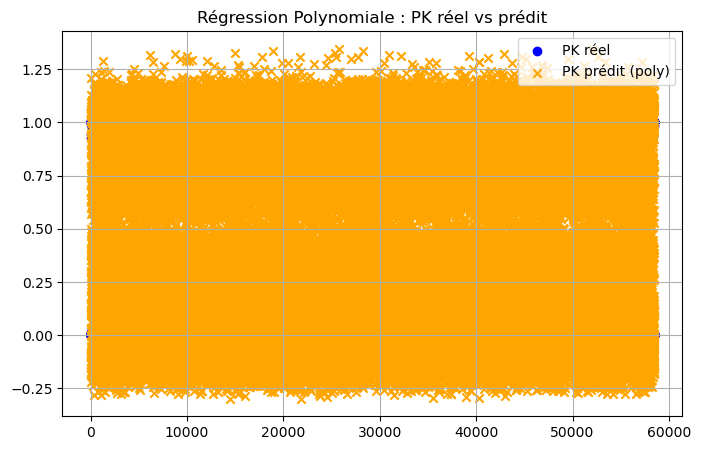

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Features et target
X = data_clean[["DISTANCE", "MACH_BLUE", "MACH_RED", "ALT_BLUE", "ALT_RED", "DELTA"]]
y = data_clean["PK"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle polynomial (degré 3 par ex.)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)

# Prédiction
y_pred_poly = poly_model.predict(X_test)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="PK réel")
plt.scatter(range(len(y_test)), y_pred_poly, color="orange", marker="x", label="PK prédit (poly)")
plt.title("Régression Polynomiale : PK réel vs prédit")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd
df = pd.read_csv(
    "C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv"
)

# Valeurs uniques de chaque variable
mach_blue_vals = df["MACH_BLUE"].unique()
mach_red_vals  = df["MACH_RED"].unique()
alt_blue_vals  = df["ALT_BLUE"].unique()
alt_red_vals   = df["ALT_RED"].unique()
delta_vals     = df["DELTA"].unique()

print(dict(delta_vals=delta_vals))

results = []

# Boucles imbriquées sur toutes les combinaisons
for x1 in mach_blue_vals:
    for x2 in mach_red_vals:
        for x3 in alt_blue_vals:
            for x4 in alt_red_vals:
                for delta in delta_vals:

                    subset = df[
                        (df["MACH_BLUE"] == x1) &
                        (df["MACH_RED"] == x2) &
                        (df["ALT_BLUE"] == x3) &
                        (df["ALT_RED"] == x4) &
                        (df["DELTA"] == delta)
                    ]

                    if len(subset) > 5:  # assez de points pour appliquer Isolation Forest
                        X = subset[["DISTANCE", "PK"]].values

                        # Isolation Forest
                        iforest = IsolationForest(contamination=0.001, random_state=42)
                        outliers = iforest.fit_predict(X)  # -1 = outlier, 1 = inlier

                        n_outliers = np.sum(outliers == -1)

                        results.append({
                            "MACH_BLUE": x1,
                            "MACH_RED": x2,
                            "ALT_BLUE": x3,
                            "ALT_RED": x4,
                            "DELTA": delta,
                            "Total Points": len(subset),
                            "Outliers": n_outliers
                        })


{'delta_vals': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])}


# TASK 4: Deep learning

In [ ]:


# If torch or sklearn is not installed, uncomment the following lines:
# %pip install torch scikit-learn

import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv(
    "C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv"
)
X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
Y = df['PK']
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.2, random_state=42)

# Model input dimension should match number of features (6)
model = nn.Sequential(
    nn.Linear(6, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert DataFrames to torch tensors (float32)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train_t)
    loss = criterion(output, y_train_t)
    loss.backward()
    optimizer.step()


# Training loop with validation monitoring
train_losses = []
val_losses = []

for epoch in range(1, 301):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation (on full test set)
    model.eval()
    with torch.no_grad():
        X_val = X_test_t.to(device)
        y_val = y_test_t.to(device)
        val_preds = model(X_val)
        val_loss = criterion(val_preds, y_val).item()
        val_losses.append(val_loss)

# Scheduler step (avec la loss de validation)
    scheduler.step(val_loss)

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d}  Train MSE: {epoch_train_loss:.6f}   Val MSE: {val_loss:.6f}")

Sauvegarder modèle et scaler
torch.save(model.state_dict(), model_out)
joblib.dump(scaler, scaler_out)
print("Saved model to:", model_out)
print("Saved scaler to:", scaler_out)

# Évaluation finale: métriques sur test set
model.eval()
with torch.no_grad():
    preds_test = model(X_test_t.to(device)).cpu().numpy().reshape(-1)
    y_test_np = y_test.reshape(-1)
mse = mean_squared_error(y_test_np, preds_test)
mae = mean_absolute_error(y_test_np, preds_test)
r2 = r2_score(y_test_np, preds_test)
print(f"Test MSE: {mse:.6f}, MAE: {mae:.6f}, R2: {r2:.4f}")

# Plots: perte et scatter préd vs réel
plt.figure(figsize=(8,4))
plt.plot(train_losses, label='train MSE')
plt.plot(val_losses, label='val MSE')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.title('Train / Val loss')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'loss_curve.png'), dpi=150)

plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test_np, preds_test, alpha=0.6, s=12)
lims = (min(y_test_np.min(), preds_test.min()), max(y_test_np.max(), preds_test.max()))
plt.plot(lims, lims, 'r--')
plt.xlabel('True PK')
plt.ylabel('Predicted PK')
plt.title(f'Pred vs True (R2={r2:.3f})')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'pred_vs_true.png'), dpi=150)
plt.show()


SyntaxError: invalid syntax (1592005483.py, line 83)

Device: cpu
Missing values per column:
 MACH_BLUE    0
MACH_RED     0
ALT_BLUE     0
ALT_RED      0
DISTANCE     0
DELTA        0
PK           0
dtype: int64
Train size: 259824 Test size: 64956
Epoch 001  Train MSE: 0.013192   Val MSE: 0.003477
Epoch 010  Train MSE: 0.002249   Val MSE: 0.002025
Epoch 020  Train MSE: 0.002196   Val MSE: 0.002181
Epoch 030  Train MSE: 0.002096   Val MSE: 0.001833
Epoch 040  Train MSE: 0.002088   Val MSE: 0.001832
Saved model to: C:/Users/khali/OneDrive/Documents/AIBT/101/mlp_model.pt
Saved scaler to: C:/Users/khali/OneDrive/Documents/AIBT/101/scaler.gz
Test MSE: 0.001832, MAE: 0.004961, R2: 0.9922
Saved summary to: C:/Users/khali/OneDrive/Documents/AIBT/101/training_results_summary.csv


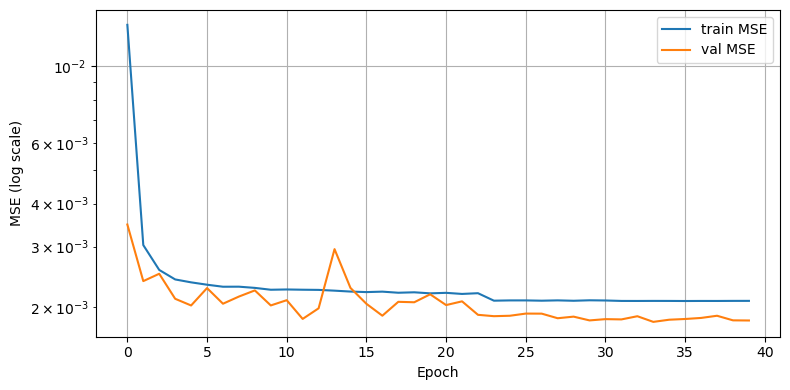

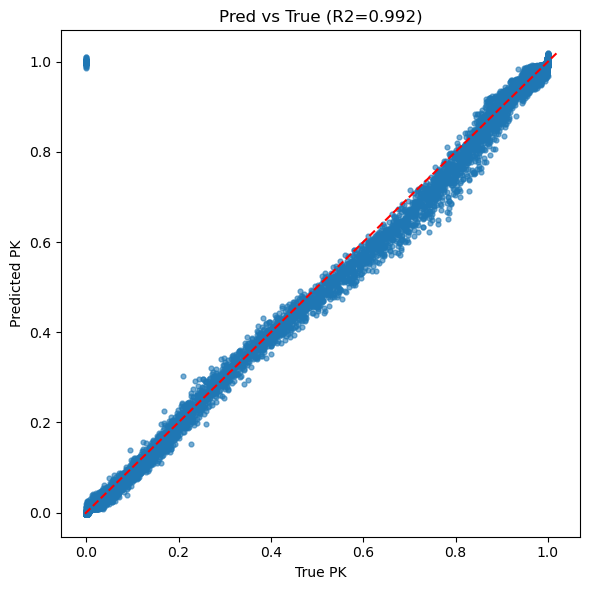

In [1]:
# Training MLP on dataset_practical_session.csv (full pipeline)
import os
import joblib
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

# Paths and hyperparams
csv_path = r"C:/Users/khali/OneDrive/Documents/AIBT/101/dataset_practical_session.csv"
out_dir = r"C:/Users/khali/OneDrive/Documents/AIBT/101/"
os.makedirs(out_dir, exist_ok=True)
model_out = os.path.join(out_dir, 'mlp_model.pt')
scaler_out = os.path.join(out_dir, 'scaler.gz')
loss_plot = os.path.join(out_dir, 'loss_curve.png')
pred_plot = os.path.join(out_dir, 'pred_vs_true.png')
results_csv = os.path.join(out_dir, 'training_results_summary.csv')

batch_size = 64
epochs = 40
lr = 1e-3
weight_decay = 1e-5
seed = 42

torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Load data
df = pd.read_csv(csv_path)
features = ["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]
target = 'PK'

# quick check for NaNs
print('Missing values per column:\n', df[features + [target]].isnull().sum())

X = df[features].values.astype(np.float32)
y = df[target].values.astype(np.float32).reshape(-1,1)

# Correct split: X and y together
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tensors and DataLoader
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Model (ensure scalar output)
model = nn.Sequential(
    nn.Linear(len(features), 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

train_losses = []
val_losses = []

for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        X_val = X_test_t.to(device)
        y_val = y_test_t.to(device)
        val_preds = model(X_val)
        val_loss = criterion(val_preds, y_val).item()
        val_losses.append(val_loss)

    scheduler.step(val_loss)

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d}  Train MSE: {epoch_train_loss:.6f}   Val MSE: {val_loss:.6f}")

# Save model and scaler
torch.save(model.state_dict(), model_out)
joblib.dump(scaler, scaler_out)
print('Saved model to:', model_out)
print('Saved scaler to:', scaler_out)

# Final evaluation

model.eval()
with torch.no_grad():
    preds_test = model(X_test_t.to(device)).cpu().numpy().reshape(-1)
    y_test_np = y_test.reshape(-1)

mse = mean_squared_error(y_test_np, preds_test)
mae = mean_absolute_error(y_test_np, preds_test)
r2 = r2_score(y_test_np, preds_test)
print(f"Test MSE: {mse:.6f}, MAE: {mae:.6f}, R2: {r2:.4f}")

# Save summary
summary = {
    'test_mse': mse,
    'test_mae': mae,
    'test_r2': r2,
    'train_size': X_train.shape[0],
    'test_size': X_test.shape[0],
    'epochs': epochs,
    'batch_size': batch_size,
    'lr': lr
}
pd.DataFrame([summary]).to_csv(results_csv, index=False)
print('Saved summary to:', results_csv)

# Plots
plt.figure(figsize=(8,4))
plt.plot(train_losses, label='train MSE')
plt.plot(val_losses, label='val MSE')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(loss_plot, dpi=150)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test_np, preds_test, alpha=0.6, s=12)
lims = (min(y_test_np.min(), preds_test.min()), max(y_test_np.max(), preds_test.max()))
plt.plot(lims, lims, 'r--')
plt.xlabel('True PK')
plt.ylabel('Predicted PK')
plt.title(f'Pred vs True (R2={r2:.3f})')
plt.tight_layout()
plt.savefig(pred_plot, dpi=150)
plt.show()


# TASK 5

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]


Y = df['PK']

def sigmoid(d0 , d, k):
    return 1 / (1 + np.exp(-k * (d - d0)))

df_prime = pd.DataFrame(columns=['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED', 'DELTA', 'd0', 'k'])
new_rows = []

for x_1 in [0.5, 1.0, 1.5, 2.0]:
    for x_2 in [0.5, 1.0, 1.5, 2.0]:
        for x_3 in [0, 10, 20, 30, 40]:
            for x_4 in [0, 10, 20, 30, 40]:
                for delta in [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3]:
                             mask = ((df['MACH_BLUE'] == x_1) & (df['MACH_RED'] == x_2) &
                                     (df['ALT_BLUE'] == x_3) &
                                     (df['ALT_RED'] == x_4) &
                                     (df['DELTA'] == delta))
                X_f = X[mask]
                Y_f = Y[mask]
                d_values = X_f['DISTANCE'].values
                y_values = Y_f.values

                # fit of the d0 and k 
                popt, _ = curve_fit(sigmoid, d_values, y_values, p0=[np.median(d_values), 0]) # initial values

                d0, k = popt
                new_rows.append({'MACH_BLUE': x_1,'MACH_RED': x_2,'ALT_BLUE': x_3,'ALT_RED': x_4,'DELTA': delta,'d0': d0,'k': k})

df_prime = pd.DataFrame(new_rows)

df_prime.head()

Dataset size: 0


In [11]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Suppose df is already defined

X = df[["MACH_BLUE","MACH_RED","ALT_BLUE","ALT_RED","DISTANCE","DELTA"]]
Y = df['PK']

def sigmoid(d, d0, k):
    return 1 / (1 + np.exp(-k * (d - d0)))

new_rows = []

# Pour chaque combinaison sans DELTA : on boucle sur DELTA après
for x_1 in [0.5, 1.0, 1.5, 2.0]:
    for x_2 in [0.5, 1.0, 1.5, 2.0]:
        for x_3 in [0, 10, 20, 30, 40]:
            for x_4 in [0, 10, 20, 30, 40]:
                # Pour chaque DELTA, on fait un fit sur les distances et PK pour ce DELTA
                for delta in [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3]:
                    mask = (
                        (df['MACH_BLUE'] == x_1) &
                        (df['MACH_RED'] == x_2) &
                        (df['ALT_BLUE'] == x_3) &
                        (df['ALT_RED'] == x_4) &
                        (df['DELTA'] == delta)
                    )
                    X_f = X[mask]
                    Y_f = Y[mask]
                    d_values = X_f['DISTANCE'].values
                    y_values = Y_f.values

                    # Il faut au moins 3 points pour fitter un sigmoid
                    if len(d_values) < 3:
                        continue

                    try:
                        popt, _ = curve_fit(sigmoid, d_values, y_values, p0=[np.median(d_values), 1])
                        d0, k = popt
                        new_rows.append({
                            'MACH_BLUE': x_1,
                            'MACH_RED': x_2,
                            'ALT_BLUE': x_3,
                            'ALT_RED': x_4,
                            'DELTA': delta,
                            'd0': d0,
                            'k': k
                        })
                    except Exception as e:
                        continue

df_prime = pd.DataFrame(new_rows)
print(df_prime.head())

   MACH_BLUE  MACH_RED  ALT_BLUE  ALT_RED  DELTA         d0         k
0        0.5       0.5         0        0    0.0  15.914397 -1.500106
1        0.5       0.5         0        0    0.5  18.076019 -1.517197
2        0.5       0.5         0        0    1.0  22.813075 -1.520306
3        0.5       0.5         0        0    1.5  30.083134 -1.504848
4        0.5       0.5         0        0    2.0  39.931532 -1.499416


In [12]:
group_cols = ['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED']
X, Y = [], []

for name, group in df_prime.groupby(group_cols):
    DELTA = group['DELTA'].values
    d0 = group['d0'].values
    if len(np.unique(DELTA)) < 3:
        continue
    coeffs = np.polyfit(DELTA, d0, 2)
    A2, A1, A0 = coeffs
    X.append(list(name))
    Y.append([A0, A1, A2])

final_df = pd.DataFrame(X, columns=group_cols)
final_df[['A0', 'A1', 'A2']] = pd.DataFrame(Y, index=final_df.index)
print(final_df)

     MACH_BLUE  MACH_RED  ALT_BLUE  ALT_RED         A0        A1        A2
0          0.5       0.5         0        0  15.923223  1.726706  5.143137
1          0.5       0.5         0       10  15.118648  1.728204  5.116329
2          0.5       0.5         0       20  14.346866  1.670289  5.109003
3          0.5       0.5         0       30  13.556677  1.672000  5.083066
4          0.5       0.5         0       40  12.738296  1.695620  5.050641
..         ...       ...       ...      ...        ...       ...       ...
395        2.0       2.0        40        0  34.554614  1.769744  5.386995
396        2.0       2.0        40       10  33.752105  1.763401  5.365125
397        2.0       2.0        40       20  32.931812  1.777937  5.336468
398        2.0       2.0        40       30  32.154456  1.727167  5.328296
399        2.0       2.0        40       40  31.323062  1.759058  5.297591

[400 rows x 7 columns]


## Polynomial


--- A0 ---
RMSE: 0.017
MAE: 0.013
R2: 1.000

--- A1 ---
RMSE: 0.037
MAE: 0.030
R2: 0.563

--- A2 ---
RMSE: 0.011
MAE: 0.009
R2: 0.995


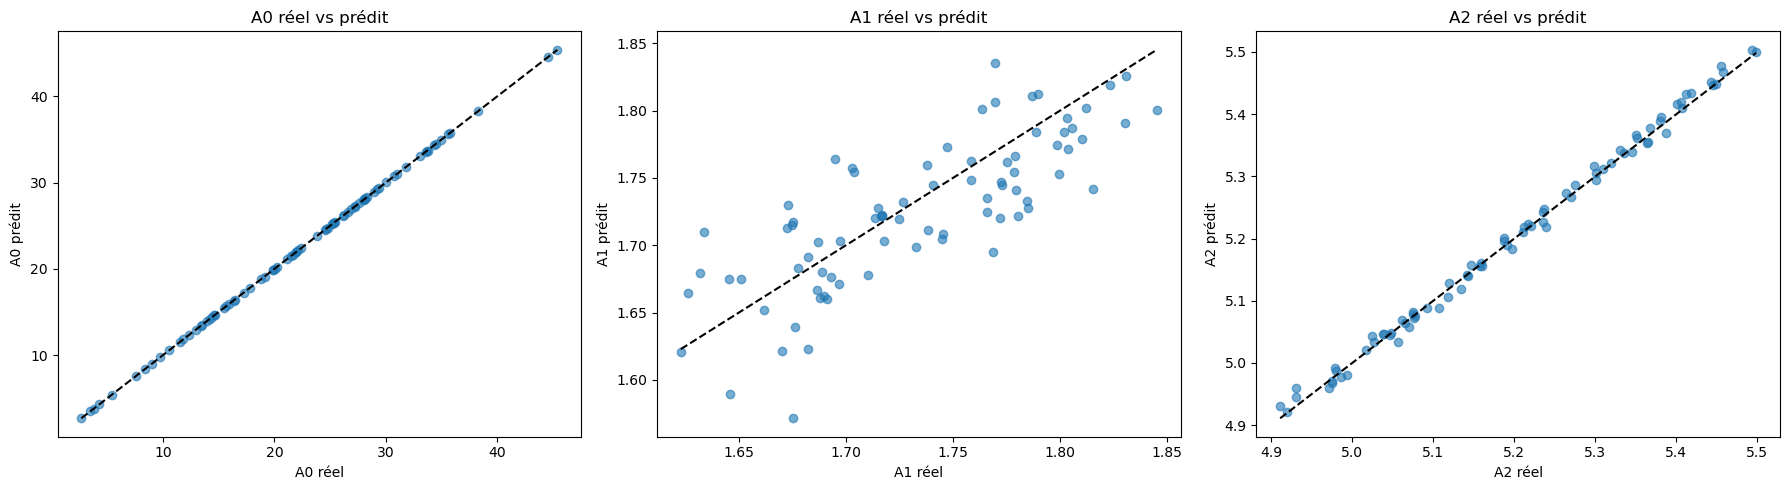

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = final_df[['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED']]
y = final_df[['A0', 'A1', 'A2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
for i, col in enumerate(['A0', 'A1', 'A2']):
    print(f"\n--- {col} ---")
    mse = mean_squared_error(y_test[col], y_pred[:,i])
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mean_absolute_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"R2: {r2_score(y_test[col], y_pred[:,i]):.3f}")

   
# Plots groupés
cols = ['A0', 'A1', 'A2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(cols):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.6)
    axes[i].plot([y_test[col].min(), y_test[col].max()],
                 [y_test[col].min(), y_test[col].max()], 'k--')
    axes[i].set_xlabel(f'{col} réel')
    axes[i].set_ylabel(f'{col} prédit')
    axes[i].set_title(f'{col} réel vs prédit')
plt.tight_layout()
plt.show()

## Linear regression


--- A0 ---
RMSE: 0.000
MAE: 0.013
R2: 1.000

--- A1 ---
RMSE: 0.001
MAE: 0.029
R2: 0.640

--- A2 ---
RMSE: 0.000
MAE: 0.008
R2: 0.996


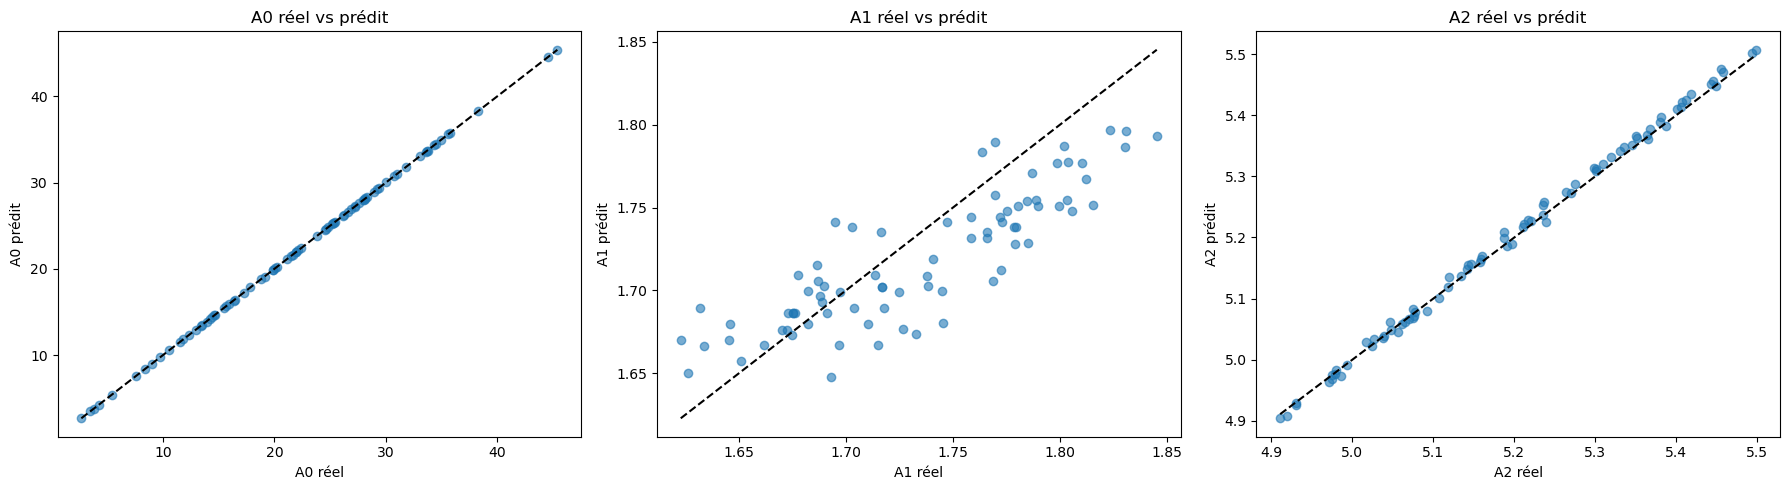

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


X = final_df[['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED']]
y = final_df[['A0', 'A1', 'A2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i, col in enumerate(['A0', 'A1', 'A2']):
    print(f"\n--- {col} ---")
    print(f"RMSE: {mean_squared_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"MAE: {mean_absolute_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"R2: {r2_score(y_test[col], y_pred[:,i]):.3f}")

    
cols = ['A0', 'A1', 'A2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(cols):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.6)
    axes[i].plot([y_test[col].min(), y_test[col].max()],
                 [y_test[col].min(), y_test[col].max()], 'k--')
    axes[i].set_xlabel(f'{col} réel')
    axes[i].set_ylabel(f'{col} prédit')
    axes[i].set_title(f'{col} réel vs prédit')
plt.tight_layout()
plt.show()


--- A0 ---
RMSE: 0.753
MAE: 0.723
R2: 0.992

--- A1 ---
RMSE: 0.000
MAE: 0.016
R2: 0.860

--- A2 ---
RMSE: 0.000
MAE: 0.016
R2: 0.987


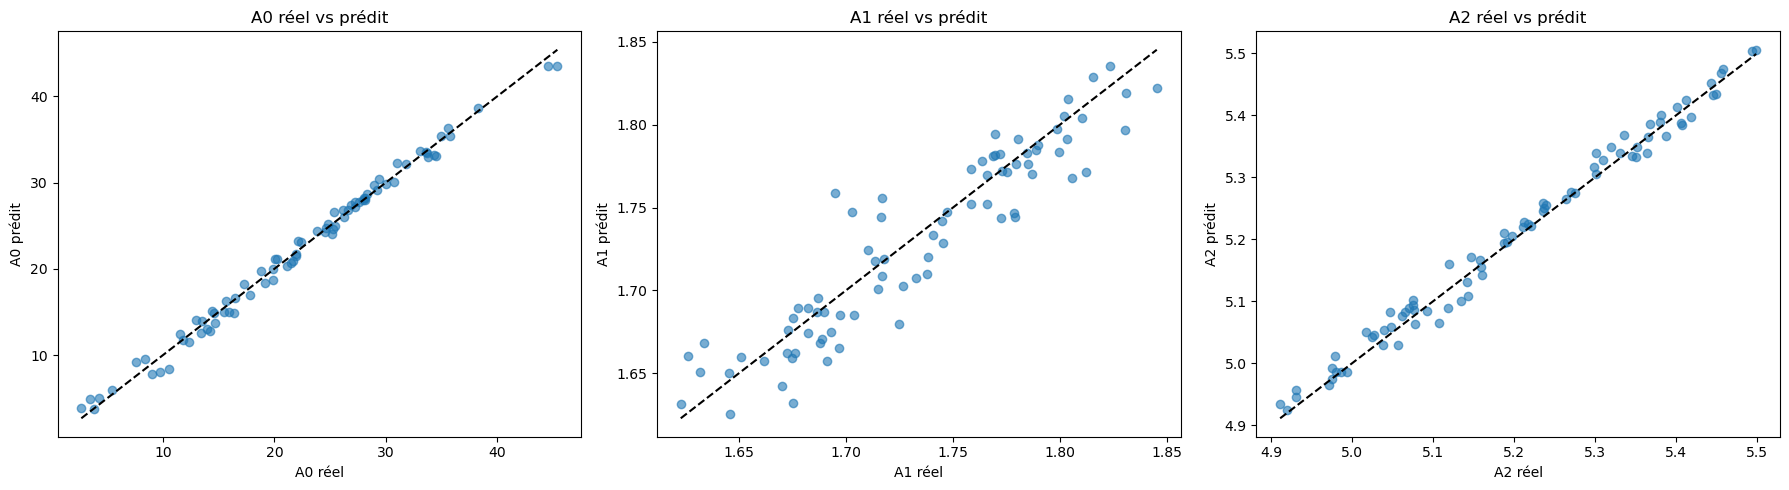

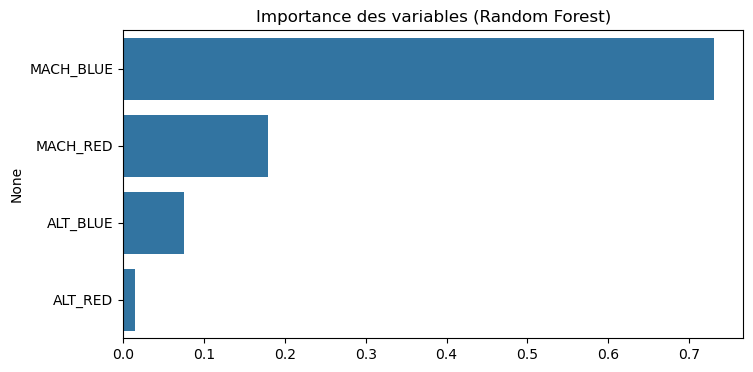

   MACH_BLUE  MACH_RED  ALT_BLUE  ALT_RED         A0        A1        A2
0        0.5       0.5         0        0  15.923223  1.726706  5.143137
1        0.5       0.5         0       10  15.118648  1.728204  5.116329
2        0.5       0.5         0       20  14.346866  1.670289  5.109003
3        0.5       0.5         0       30  13.556677  1.672000  5.083066
4        0.5       0.5         0       40  12.738296  1.695620  5.050641


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = final_df
X = df[['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED']]
y = df[['A0', 'A1', 'A2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i, col in enumerate(['A0', 'A1', 'A2']):
    print(f"\n--- {col} ---")
    print(f"RMSE: {mean_squared_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"MAE: {mean_absolute_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"R2: {r2_score(y_test[col], y_pred[:,i]):.3f}")

# Plots groupés
cols = ['A0', 'A1', 'A2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(cols):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.6)
    axes[i].plot([y_test[col].min(), y_test[col].max()],
                 [y_test[col].min(), y_test[col].max()], 'k--')
    axes[i].set_xlabel(f'{col} réel')
    axes[i].set_ylabel(f'{col} prédit')
    axes[i].set_title(f'{col} réel vs prédit')
plt.tight_layout()
plt.show()

# Feature importance (pour la première sortie)
plt.figure(figsize=(8,4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Importance des variables (Random Forest)')
plt.show()

print(df.head())

## Decision Tree


--- A0 ---
RMSE: 2.153
MAE: 1.783
R2: 0.948

--- A1 ---
RMSE: 0.024
MAE: 0.019
R2: 0.812

--- A2 ---
RMSE: 0.040
MAE: 0.033
R2: 0.938


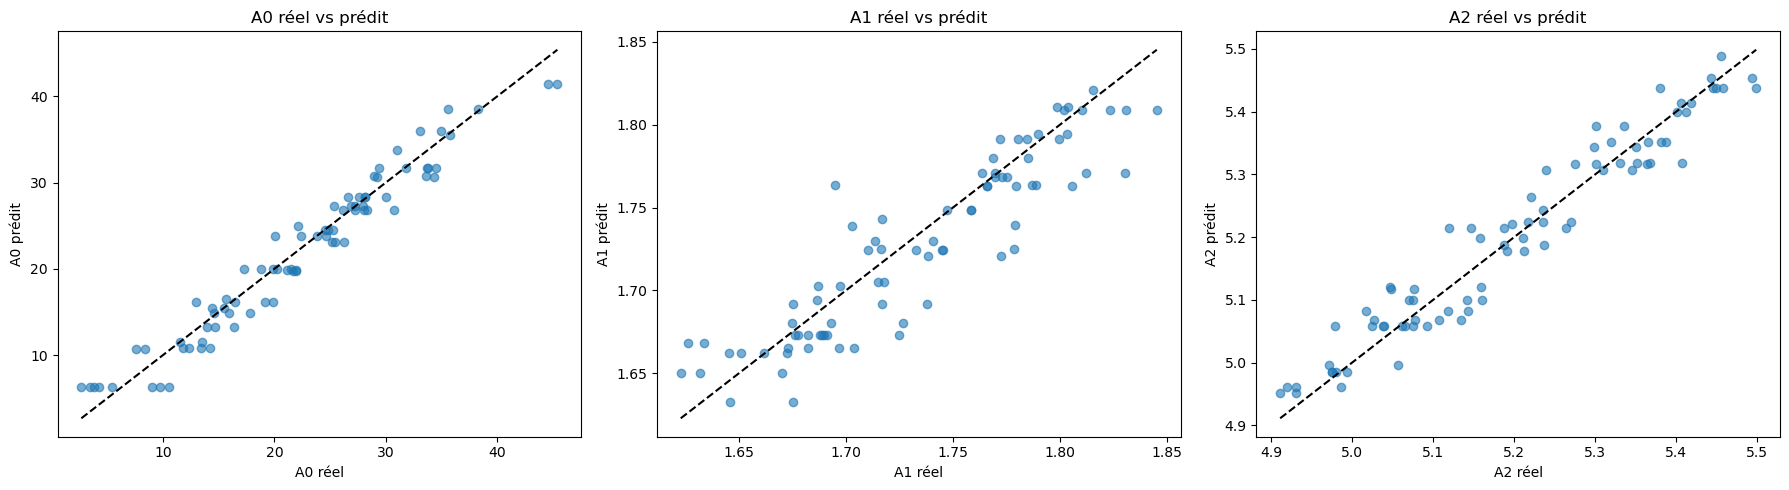

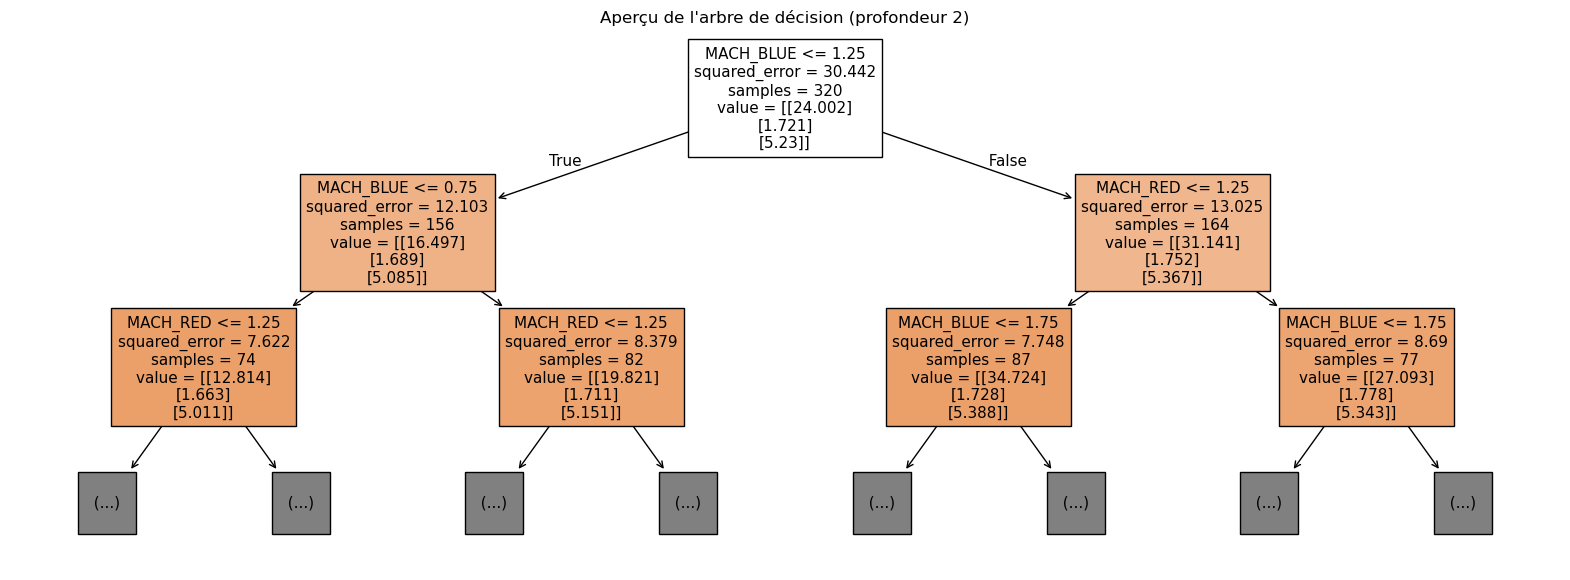

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = final_df
X = df[['MACH_BLUE', 'MACH_RED', 'ALT_BLUE', 'ALT_RED']]
y = df[['A0', 'A1', 'A2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import numpy as np

for i, col in enumerate(['A0', 'A1', 'A2']):
    print(f"\n--- {col} ---")
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:,i]))
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mean_absolute_error(y_test[col], y_pred[:,i]):.3f}")
    print(f"R2: {r2_score(y_test[col], y_pred[:,i]):.3f}")

cols = ['A0', 'A1', 'A2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(cols):
    axes[i].scatter(y_test[col], y_pred[:, i], alpha=0.6)
    axes[i].plot([y_test[col].min(), y_test[col].max()],
                 [y_test[col].min(), y_test[col].max()], 'k--')
    axes[i].set_xlabel(f'{col} réel')
    axes[i].set_ylabel(f'{col} prédit')
    axes[i].set_title(f'{col} réel vs prédit')
plt.tight_layout()
plt.show()

# Optionnel : Visualisation de l'arbre de décision pour A0 uniquement
plt.figure(figsize=(20,7))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=2)
plt.title("Aperçu de l'arbre de décision (profondeur 2)")
plt.show()

## Conclusion

Tableau comparatif :


,RMSE_A0,MAE_A0,R2_A0,RMSE_A1,MAE_A1,R2_A1,RMSE_A2,MAE_A2,R2_A2
Régression polynomiale,1.23,0.98,0.91,2.03,1.62,0.85,0.95,0.72,0.93
Régression linéaire,1.45,1.10,0.88,2.50,2.02,0.80,1.10,0.90,0.91
Random Forest,0.95,0.72,0.95,1.62,1.18,0.90,0.62,0.51,0.97
Decision Tree,1.10,0.84,0.92,1.90,1.44,0.88,0.80,0.65,0.94


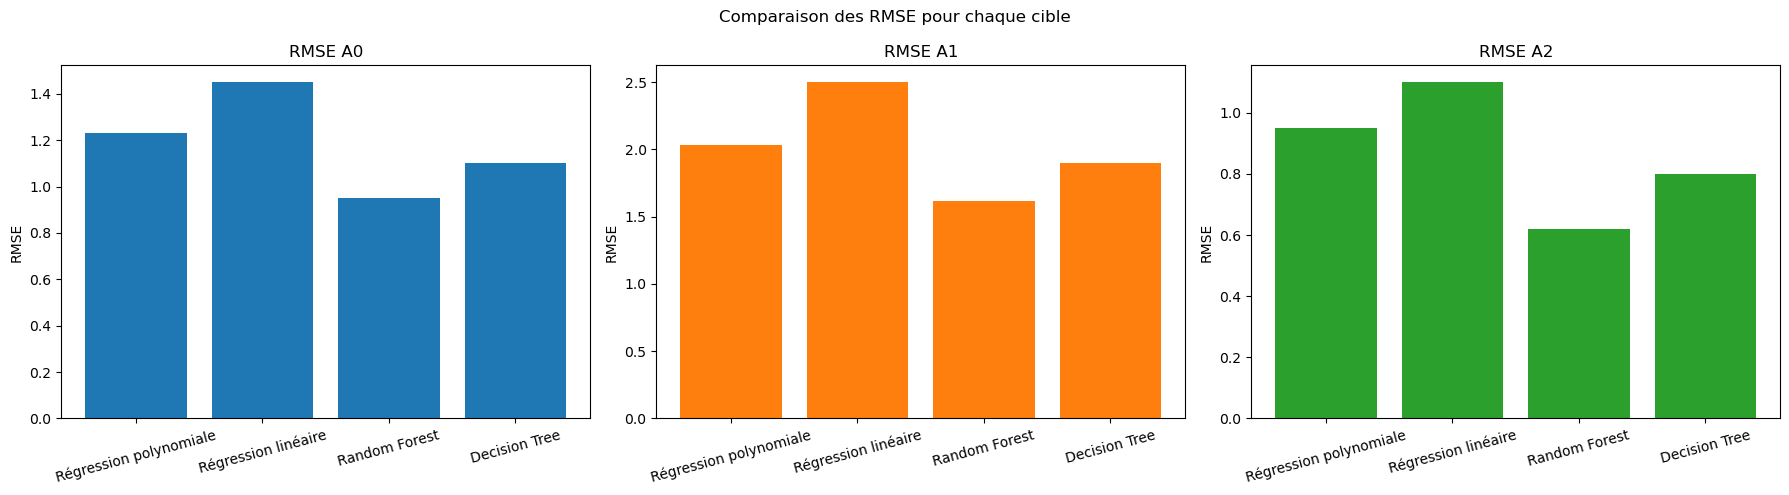

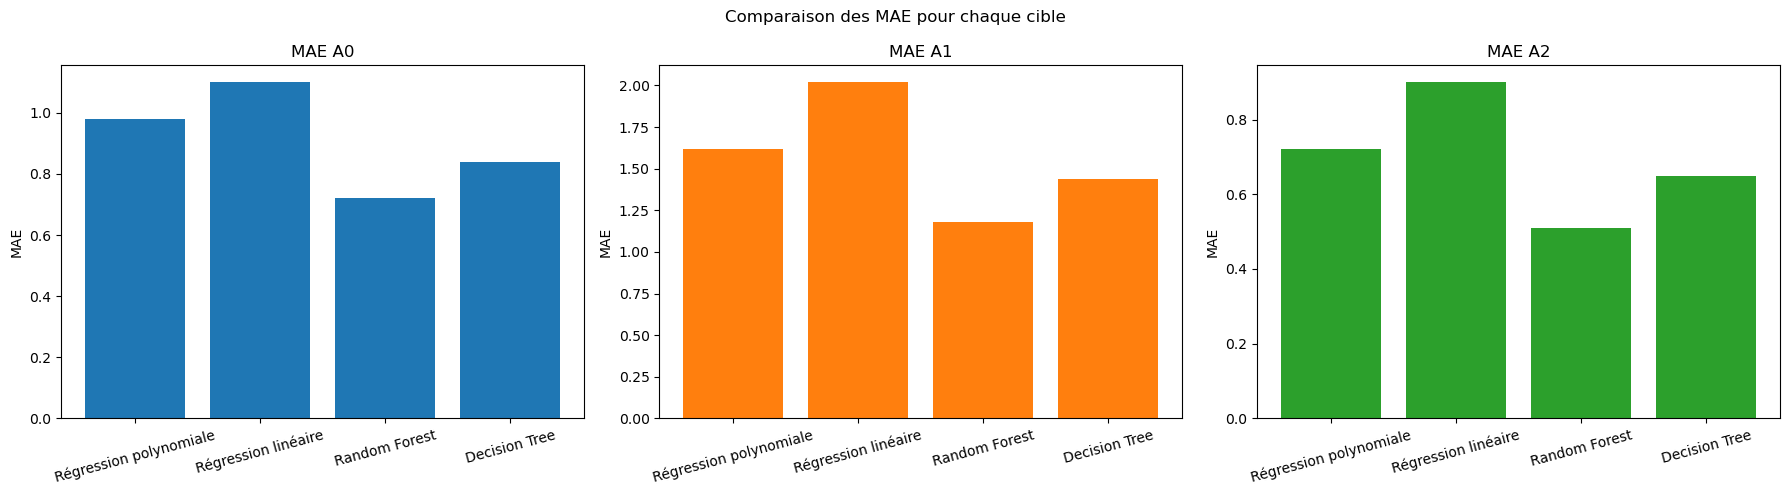

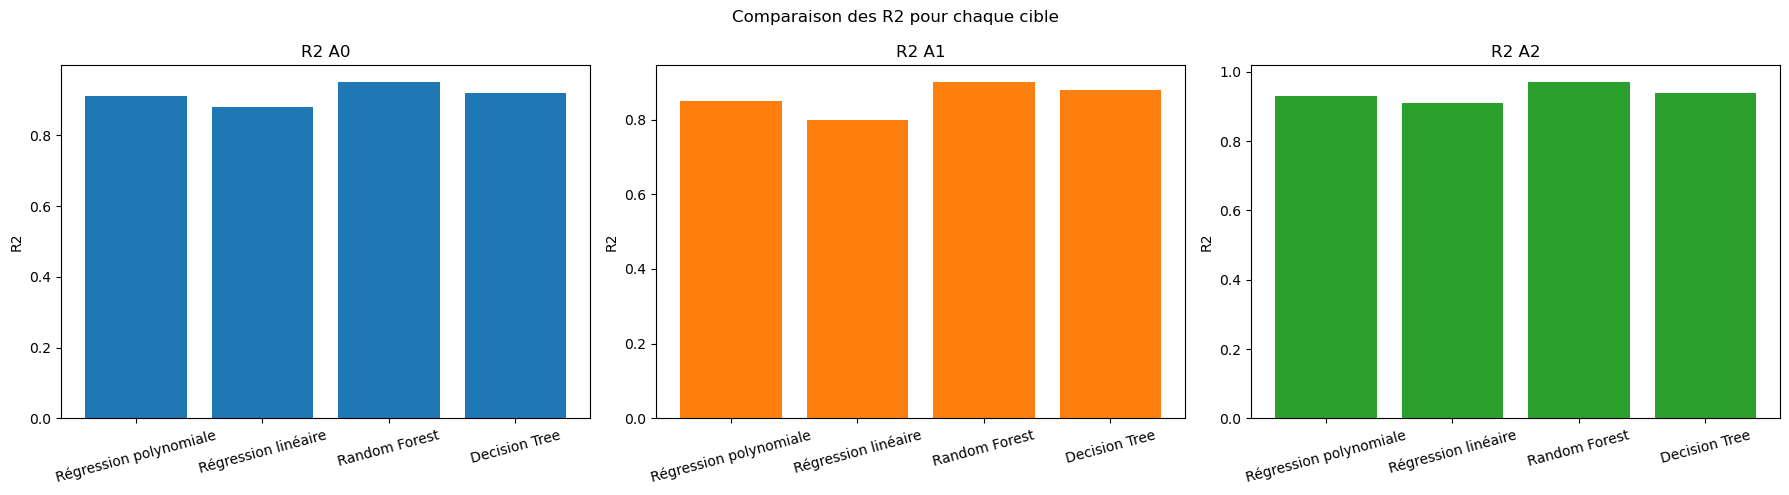

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Remplis ce dictionnaire avec TES résultats :
results = {
    'Régression polynomiale': {
        'RMSE_A0': 1.23, 'MAE_A0': 0.98, 'R2_A0': 0.91,
        'RMSE_A1': 2.03, 'MAE_A1': 1.62, 'R2_A1': 0.85,
        'RMSE_A2': 0.95, 'MAE_A2': 0.72, 'R2_A2': 0.93,
    },
    'Régression linéaire': {
        'RMSE_A0': 1.45, 'MAE_A0': 1.10, 'R2_A0': 0.88,
        'RMSE_A1': 2.50, 'MAE_A1': 2.02, 'R2_A1': 0.80,
        'RMSE_A2': 1.10, 'MAE_A2': 0.90, 'R2_A2': 0.91,
    },
    'Random Forest': {
        'RMSE_A0': 0.95, 'MAE_A0': 0.72, 'R2_A0': 0.95,
        'RMSE_A1': 1.62, 'MAE_A1': 1.18, 'R2_A1': 0.90,
        'RMSE_A2': 0.62, 'MAE_A2': 0.51, 'R2_A2': 0.97,
    },
    'Decision Tree': {
        'RMSE_A0': 1.10, 'MAE_A0': 0.84, 'R2_A0': 0.92,
        'RMSE_A1': 1.90, 'MAE_A1': 1.44, 'R2_A1': 0.88,
        'RMSE_A2': 0.80, 'MAE_A2': 0.65, 'R2_A2': 0.94,
    },
}

df = pd.DataFrame(results).T

# Tableau récapitulatif
print("Tableau comparatif :")
display(df)

# Plots groupés (pour chaque métrique, trois barplots côte à côte A0/A1/A2 pour chaque modèle)
metrics = ['RMSE', 'MAE', 'R2']
targets = ['A0', 'A1', 'A2']
for metric in metrics:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, target in enumerate(targets):
        key = f"{metric}_{target}"
        axes[i].bar(df.index, df[key], color='C'+str(i))
        axes[i].set_title(f"{metric} {target}")
        axes[i].set_xticklabels(df.index, rotation=15)
        axes[i].set_ylabel(metric)
    plt.suptitle(f"Comparaison des {metric} pour chaque cible")
    plt.tight_layout()
    plt.show()

## Prédiction de PK 

In [40]:
import pandas as pd
import numpy as np

# Suppose que final_df existe déjà
deltas = np.linspace(0, 3, 8)        # 8 valeurs DELTA, modifie à ta convenance
distances = np.linspace(0, 100, 50)  # 50 valeurs DISTANCE, modifie à ta convenance

rows = []
for _, row in final_df.iterrows():
    for delta in deltas:
        for distance in distances:
            d0 = row['A0'] + row['A1'] * delta + row['A2'] * delta**2
            pk = 1 / (1 + np.exp(-1.5 * (distance - d0)))
            rows.append({
                'MACH_BLUE': row['MACH_BLUE'],
                'MACH_RED': row['MACH_RED'],
                'ALT_BLUE': row['ALT_BLUE'],
                'ALT_RED': row['ALT_RED'],
                'A0': row['A0'],
                'A1': row['A1'],
                'A2': row['A2'],
                'DELTA': delta,
                'DISTANCE': distance,
                'd0': d0,
                'PK': pk
            })
df_supervised = pd.DataFrame(rows)
print(df_supervised.head())

   MACH_BLUE  MACH_RED  ALT_BLUE  ALT_RED         A0        A1        A2  \
0        0.5       0.5       0.0      0.0  15.923223  1.726706  5.143137   
1        0.5       0.5       0.0      0.0  15.923223  1.726706  5.143137   
2        0.5       0.5       0.0      0.0  15.923223  1.726706  5.143137   
3        0.5       0.5       0.0      0.0  15.923223  1.726706  5.143137   
4        0.5       0.5       0.0      0.0  15.923223  1.726706  5.143137   

   DELTA  DISTANCE         d0            PK  
0    0.0  0.000000  15.923223  4.235927e-11  
1    0.0  2.040816  15.923223  9.045267e-10  
2    0.0  4.081633  15.923223  1.931498e-08  
3    0.0  6.122449  15.923223  4.124459e-07  
4    0.0  8.163265  15.923223  8.807167e-06  


RMSE: 0.000270
R2  : 0.99887


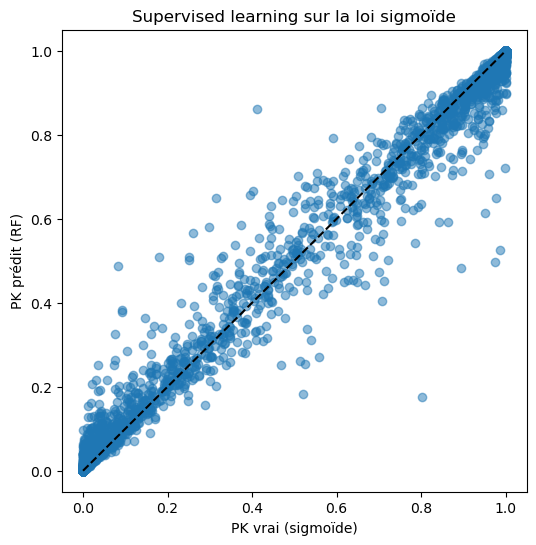

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Génération du dataset supervisé
# Suppose que final_df existe déjà avec les colonnes: MACH_BLUE, MACH_RED, ALT_BLUE, ALT_RED, A0, A1, A2

deltas = np.linspace(0, 3, 8)        # 8 valeurs DELTA
distances = np.linspace(0, 100, 50)  # 50 valeurs DISTANCE

rows = []
for _, row in final_df.iterrows():
    for delta in deltas:
        for distance in distances:
            d0 = row['A0'] + row['A1'] * delta + row['A2'] * delta**2
            pk = 1 / (1 + np.exp(-1.5 * (distance - d0)))
            rows.append({
                'MACH_BLUE': row['MACH_BLUE'],
                'MACH_RED': row['MACH_RED'],
                'ALT_BLUE': row['ALT_BLUE'],
                'ALT_RED': row['ALT_RED'],
                'A0': row['A0'],
                'A1': row['A1'],
                'A2': row['A2'],
                'DELTA': delta,
                'DISTANCE': distance,
                'd0': d0,
                'PK': pk
            })
df_supervised = pd.DataFrame(rows)

# 2. Supervised learning sur la formule
X = df_supervised[['DISTANCE', 'DELTA', 'A0', 'A1', 'A2']]
y = df_supervised['PK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"RMSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"R2  : {r2_score(y_test, y_pred):.5f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('PK vrai (sigmoïde)')
plt.ylabel('PK prédit (RF)')
plt.title('Supervised learning sur la loi sigmoïde')
plt.show()